In [1]:
!git clone https://github.com/gtpgg1013/Mullin.git

Cloning into 'Mullin'...
remote: Enumerating objects: 103, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 287 (delta 45), reused 81 (delta 30), pack-reused 184
Receiving objects: 100% (287/287), 42.41 MiB | 41.09 MiB/s, done.
Resolving deltas: 100% (117/117), done.


In [0]:
# train_combat = pd.read_csv(colabdir+"train_combat.csv")
# train_payment = pd.read_csv(colabdir+"train_payment.csv")
# train_pledge = pd.read_csv(colabdir+"train_pledge.csv")
# train_trade = pd.read_csv(colabdir+"train_trade.csv")
# train_activity = pd.read_csv(colabdir+"train_activity.csv")
# train_label = pd.read_csv(colabdir+"train_label.csv")

# combat = train_combat.copy()
# pledge = train_pledge.copy()
# payment = train_payment.copy()
# trade = train_trade.copy()
# activity = train_activity.copy()

In [0]:
# !rm -rf Mullin

In [0]:
from Mullin.model.module.autoencoder import *

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Feature Pruning : 주요 피쳐들만 사용!

In [0]:
import numpy as np
import pandas as pd

colabdir = '/content/drive/My Drive/Colab Notebooks/data/'

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/0906-07-train-v2.csv')

# Basic Modeling

In [7]:
import pandas as pd
import numpy as np
from keras.layers import *
from keras.models import *

Using TensorFlow backend.


# label data

In [8]:
train_label = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/train_label.csv")
train_label.head()

,acc_id,survival_time,amount_spent
0,27835,64,0.002559
1,12351,64,0.120154
2,125437,55,0.182593
3,104483,64,0.016241
4,4704,20,0.226396


In [9]:
train_label.sort_values('acc_id').head()

,acc_id,survival_time,amount_spent
22410,2,64,0.000000
12651,5,60,0.000000
5494,8,64,0.020310
6811,17,64,0.070642
16854,20,64,0.052137


In [0]:
train_label = train_label.sort_values('acc_id')
train_label_time = train_label.drop(columns='amount_spent')
train_label_money = train_label.drop(columns='survival_time')

In [11]:
train_label_time.head()

,acc_id,survival_time
22410,2,64
12651,5,60
5494,8,64
6811,17,64
16854,20,64


In [12]:
train_label_money.head()

,acc_id,amount_spent
22410,2,0.000000
12651,5,0.000000
5494,8,0.020310
6811,17,0.070642
16854,20,0.052137


## knn clustering을 통한 

In [13]:
train_label_clustering = train_label.copy()
train_label_clustering['amo_group'] = np.where(train_label_clustering['amount_spent']

SyntaxError: ignored

# Correlationship 분석!

In [0]:
train_label.head()

In [0]:
label = train_label.copy()

In [0]:
label['isSurvival'] = label['survival_time'].transform(lambda x: 1 if x==64 else 0)

In [0]:
ids = np.unique(df.acc_id)
days = np.unique(df.day)

df_c = df.drop(['day'], axis=1)
cols = df_c.columns

In [0]:
df_c = df_c.groupby('acc_id').mean()

In [0]:
df_c.shape

(40000, 71)

In [0]:
res = np.concatenate((df_c, label[['amount_spent', 'isSurvival']]), axis=1)
res.shape

(40000, 73)

In [0]:
cols = list(cols)
cols.pop(0) # pop 'acc_id'
cols.append('label_amount_spent')
cols.append('label_isSurvival')

In [0]:
df_c = pd.DataFrame(res, index=ids, columns=cols)

In [0]:
df_c.head()

,combat_count,c_etc_cnt,c_num_opponent,c_pledge_cnt,c_random_attacker_cnt,c_random_defender_cnt,c_same_pledge_cnt,c_temp_cnt,isMajorClass,combat_logged_in,tot_start_lv,tot_end_lv,changed_lv,avg_start_lv,avg_end_lv,avg_play_rate_rank_per_p,p_c_char_cnt,p_c_sum_play_time,p_etc_cnt,p_non_c_sum_play_time,p_play_char_cnt,p_c_cnt,p_random_attacker_cnt,p_random_defender_cnt,p_same_pledge_cnt,p_temp_cnt,tot_c_rank_per_p,pledge_num_people,pledge_logged_in,sell_item_amount,sell_item_price,get_item_amount,get_item_price,trade_time_bin_0,trade_time_bin_1,trade_time_bin_2,trade_time_bin_3,trade_type_0,trade_type_1,tot_trade_amount,tot_get_money,trade_logged_in,count_sell,count_get,total_trade_count,a_death_cnt,a_enchant_count,a_exp_recovery_cnt,a_fish,a_money_change,a_npc_kill,a_party_exp,a_playtime,a_private_shop,a_quest_exp,a_revive_cnt,a_boss_monster,a_solo_exp,tot_exp,fishing_prop,qexp_per_playtime,sexp_per_playtime,pexp_per_playtime,activity_logged_in,amount_spent,max_spent,min_spent,mean_spent,tot_spent,median_spent,payment_logged_in,label_amount_spent,label_isSurvival
2,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.464286,3.783216e+06,0.107143,4.693911e+05,0.357143,0.142857,0.285714,0.500000,1.250000,0.035714,17.571429,3.313825e+06,0.714286,24.285714,1.428571,25.714286,0.000000,0.0,0.0,0.000000,-0.000312,0.000000,0.000000,3.269059,3.032170,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
5,0.642857,0.000000,0.003505,0.000000,0.000000,0.000000,0.000000,0.017133,1.000000,0.357143,7.142857,7.142857,0.0,2.380952,2.380952,0.084386,0.158793,0.509761,0.081400,0.000440,0.555776,0.000000,0.193657,0.092991,0.000000,0.257096,0.000021,63.857143,0.357143,0.000000,0.000000e+00,300.178571,1.622947e+05,0.000000,0.107143,0.178571,0.071429,0.357143,0.000000,300.178571,-1.622947e+05,0.178571,0.000000,1.785714,0.000000,0.008782,0.0,0.0,0.122961,0.005184,0.115588,0.024832,0.218433,0.000000,0.003966,0.008833,0.321429,0.076980,0.105778,0.202979,0.005810,0.154602,0.030398,0.357143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
8,4.750000,0.032175,0.108643,0.004585,0.152531,0.042252,0.000000,0.137065,0.459864,1.000000,100.000000,99.000000,-1.0,14.285714,14.142857,1.001630,2.072558,4.888566,2.191229,0.001208,7.189508,0.097048,1.201134,0.776626,1.051483,3.301987,0.005006,773.281718,1.000000,0.142857,3.639286e+06,1.571429,1.639089e+05,0.214286,0.000000,0.000000,0.142857,0.071429,0.285714,1.714286,3.475377e+06,0.178571,0.714286,1.071429,1.785714,3.284301,0.0,0.0,0.171708,0.000727,1.113307,0.000000,0.671350,0.000000,0.055752,3.303714,0.071429,1.124612,1.180364,0.168829,0.083122,2.094823,0.000000,1.000000,0.050166,0.075437,0.024894,0.050166,0.100332,0.050166,0.071429,0.020310,1.0
17,1.857143,0.024131,0.049064,0.000000,0.000000,0.084505,0.442795,0.119932,0.699405,1.000000,33.000000,34.000000,1.0,8.250000,8.500000,0.358239,0.774631,2.346199,0.446942,0.000000,2.546875,0.017367,0.329678,0.388313,0.056837,1.313732,0.000620,707.000000,1.000000,0.214286,4.428571e+06,17.714286,8.968129e+06,0.392857,0.321429,0.000000,1.035714,1.392857,0.357143,17.928571,-4.539558e+06,0.535714,3.214286,23.035714,26.250000,0.061471,0.0,0.0,0.499677,-0.000989,1.087745,0.315111,1.016597,0.000000,0.082942,0.061834,0.750000,0.330566,0.728618,1.437001,0.132524,0.509362,0.608762,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070642,1.0
20,1.357143,0.587189,0.360974,0.045846,0.000000,0.042252,0.000000,0.017133,0.000000,0.964286,22.178571,22.178571,0.0,11.089286,11.089286,0.275697,0.945006,2.461182,1.644779,0.000000,2.033032,0.294978,0.443498,0.243736,0.412594,1.051090,0.012945,910.035714,0.964286,0.142857,9.310000e+06,

In [0]:
cor = df_c.corr(method='spearman').drop(['label_isSurvival','label_amount_spent'])
sur = cor.sort_values('label_isSurvival', ascending=False).label_isSurvival
amo = cor.sort_values('label_amount_spent', ascending=False).label_amount_spent

In [0]:
# amo

In [0]:
# sur

In [0]:
print(len(amo[abs(amo)>0.2]))

48


In [0]:
print(len(sur[abs(sur)>0.1]))

36


In [0]:
sur[abs(sur)>0.1].index

Index(['activity_logged_in', 'combat_logged_in', 'a_playtime',
       'trade_logged_in', 'sell_item_price', 'count_sell', 'sell_item_amount',
       'combat_count', 'trade_type_0', 'get_item_price', 'trade_time_bin_3',
       'trade_time_bin_2', 'tot_trade_amount', 'total_trade_count',
       'a_private_shop', 'trade_time_bin_0', 'trade_time_bin_1', 'count_get',
       'a_fish', 'trade_type_1', 'a_boss_monster', 'fishing_prop',
       'get_item_amount', 'tot_start_lv', 'pledge_logged_in', 'c_temp_cnt',
       'tot_end_lv', 'a_npc_kill', 'avg_play_rate_rank_per_p',
       'p_play_char_cnt', 'a_quest_exp', 'changed_lv', 'qexp_per_playtime',
       'a_solo_exp', 'sexp_per_playtime', 'tot_exp'],
      dtype='object')

In [0]:
amo_threshold = 0.2
amo_droplist = amo[abs(amo)<amo_threshold].index

sur_threshold = 0.15
sur_droplist = sur[abs(sur)<sur_threshold].index

## 각 모델별 데이터 생성

In [0]:
data_amo = df.drop(columns=amo_droplist)
data_sur = df.drop(columns=sur_droplist)
print(data_amo.shape, data_sur.shape)

(1120000, 50) (1120000, 26)


In [0]:
data_amo.head()

,acc_id,day,combat_count,c_etc_cnt,c_num_opponent,c_pledge_cnt,c_same_pledge_cnt,c_temp_cnt,tot_start_lv,tot_end_lv,avg_play_rate_rank_per_p,p_c_char_cnt,p_c_sum_play_time,p_etc_cnt,p_play_char_cnt,p_c_cnt,p_random_attacker_cnt,p_random_defender_cnt,p_same_pledge_cnt,p_temp_cnt,tot_c_rank_per_p,pledge_num_people,pledge_logged_in,get_item_amount,get_item_price,trade_time_bin_3,trade_type_0,trade_type_1,tot_trade_amount,trade_logged_in,count_get,total_trade_count,a_fish,a_npc_kill,a_party_exp,a_quest_exp,a_revive_cnt,a_boss_monster,a_solo_exp,fishing_prop,qexp_per_playtime,sexp_per_playtime,pexp_per_playtime,amount_spent,max_spent,min_spent,mean_spent,tot_spent,median_spent,payment_logged_in
0,2,1,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,114.0,1.0,2.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,2,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13000000.0,0.0,1.0,1.0,5.0,1.0,2.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,3,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,31.0,1.0,2.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,4,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,5,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,2.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 표준화 / 정규화

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaled_amo = MinMaxScaler().fit_transfrom(data_amo)
X = scaler.fit_transform(df_sur.values).reshape(40000,28,-1)

# Model for Predicing survival time

## data preprocessing

In [0]:
data = X

In [0]:
# data = encoding
# data = outputs

In [0]:
# xdata
data.shape

(40000, 28, 24)

## data를 timestep=7로 만들어야 함! : 이건 일단 나중에

In [0]:
# ydata
ytrain_time = train_label_time['survival_time'].values.reshape(40000,-1)
ytrain_time

array([[64],
       [60],
       [64],
       ...,
       [64],
       [64],
       [64]])

In [0]:
ytrain_time.shape

(40000, 1)

In [0]:
from keras.utils.np_utils import to_categorical
ytrain_time_ohe = to_categorical(ytrain_time)
ytrain_time_ohe.shape

(40000, 65)

In [0]:
input_dim = data.shape[2]
time_step = 28
ylabel_dim = ytrain_time_ohe.shape[1]

In [0]:
input_dim

24

In [0]:
# from sklearn.model_selection import train_test_split

In [0]:
# x_train, x_test, y_train, y_test = train_test_split(data, ytrain_time_ohe, test_size=0.2, random_state=42)

In [0]:
data.shape

(40000, 28, 24)

In [0]:
from sklearn.model_selection import train_test_split
# x_train, x_test = data[8000:,:,:], data[:8000,:,:]
# y_train, y_test = ytrain_time_ohe[8000:,:], ytrain_time_ohe[:8000,:]
x_train, x_test, y_train, y_test = train_test_split(data, ytrain_time_ohe)

# model for predicting survival time : many to many (not AR)

In [0]:
import pandas as pd
import numpy as np
from keras.layers import *
from keras.models import *
import keras.backend as K
import keras
import tensorflow as tf

In [0]:
tf.reset_default_graph()

K.clear_session()

model = Sequential()
model.add(LSTM(32, return_sequences=True, input_shape=(time_step, input_dim)))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32, return_sequences=True))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(ylabel_dim, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 28, 32)            7296      
_________________________________________________________________
lstm_2 (LSTM)                (None, 28, 32)            8320      
_________________________________________________________________
lstm_3 (LSTM)                (None, 28, 32)            8320      
_________________________________________________________________
flatten_1 (Flatten)          (None, 896)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               114816    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 65)               

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

model_path = colabdir + "LSTM_survival_time_09_06.h5"

cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
cb_es = EarlyStopping(monitor='val_loss', patience=15)

model.fit(x_train, y_train, batch_size=128, epochs=80, validation_data=(x_test,y_test), callbacks=[cb_checkpoint, cb_es])

Train on 30000 samples, validate on 10000 samples
Epoch 1/80
30000/30000 [==============================] - 46s 2ms/step - loss: 2.4004 - acc: 0.5449 - val_loss: 2.3239 - val_acc: 0.5509

Epoch 00001: val_loss improved from inf to 2.32386, saving model to /content/drive/My Drive/Colab Notebooks/data/LSTM_survival_time_09_06.h5
Epoch 2/80
30000/30000 [==============================] - 45s 1ms/step - loss: 2.2459 - acc: 0.5524 - val_loss: 2.1959 - val_acc: 0.5597

Epoch 00002: val_loss improved from 2.32386 to 2.19590, saving model to /content/drive/My Drive/Colab Notebooks/data/LSTM_survival_time_09_06.h5
Epoch 3/80
30000/30000 [==============================] - 45s 2ms/step - loss: 2.1944 - acc: 0.5564 - val_loss: 2.2315 - val_acc: 0.5589

Epoch 00003: val_loss did not improve from 2.19590
Epoch 4/80
30000/30000 [==============================] - 45s 1ms/step - loss: 2.1624 - acc: 0.5599 - val_loss: 2.1318 - val_acc: 0.5666

Epoch 00004: val_loss improved from 2.19590 to 2.13178, savin

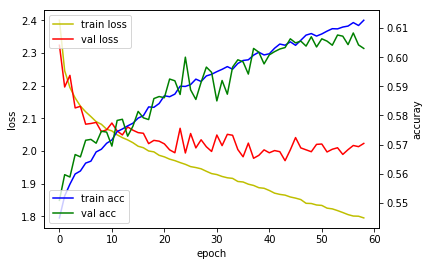

In [0]:
import pickle

hist = model.history

with open(colabdir+"LSTM_survival_time_09_06_hist.txt", "wb") as f:
  pickle.dump(hist, f)

loaded_hist = None

with open(colabdir+"LSTM_survival_time_09_06_hist.txt", "rb") as f:
  loaded_hist = pickle.load(f)
  
# 저장한 histroy file을 load하여 시각화!

hist = loaded_hist

# hist = model.history

import matplotlib.pyplot as plt

%matplotlib inline

fig, loss_ax = plt.subplots()
# fig2, acc_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

## model을 Json으로 저장

## model을 jsom으로부터 로드

In [0]:
from keras.models import model_from_json 
json_file = open("/content/drive/My Drive/Colab Notebooks/data/LSTM_survival_time_0828.json", "r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

## model을 h5 파일로 저장

## model의 history 저장

In [0]:
import pickle

with open("/content/drive/My Drive/Colab Notebooks/data/LSTM_survival_time_0828_hist.txt", "wb") as f:
  pickle.dump(hist, f)

In [0]:
loaded_hist = None

with open("/content/drive/My Drive/Colab Notebooks/data/LSTM_survival_time_0828_hist.txt", "rb") as f:
  loaded_hist = pickle.load(f)

In [0]:
loaded_hist

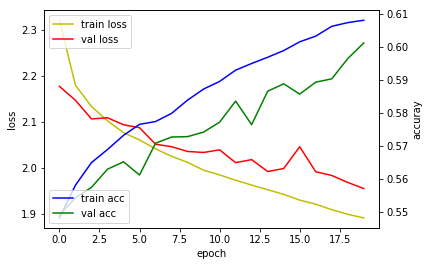

In [0]:
# 저장한 histroy file을 load하여 시각화!

loaded_hist = model.history

import matplotlib.pyplot as plt

%matplotlib inline

fig, loss_ax = plt.subplots()
# fig2, acc_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

## Restore and Train

In [0]:
import pandas as pd
import numpy as np
from keras.layers import *
from keras.models import *
import keras.backend as K
import keras
import tensorflow as tf

tf.reset_default_graph()

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(time_step, input_dim)))
model.add(Dropout(0.3))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(ylabel_dim, activation='softmax'))

model.summary()

In [0]:
tf.reset_default_graph()

K.clear_session()

from keras.models import model_from_json 
json_file = open("/content/drive/My Drive/Colab Notebooks/data/LSTM_survival_time_0828.json", "r")
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)

# model.add(LSTM(128, return_sequences=True, input_shape=(time_step, input_dim)))
# model.add(Dropout(0.3))
# model.add(LSTM(128, return_sequences=True))
# model.add(Dropout(0.3))
# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.3))
# model.add(Dense(ylabel_dim, activation='softmax'))

model.load_weights("/content/drive/My Drive/Colab Notebooks/data/LSTM_survival_time_0828.h5")

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 28, 128)           92160     
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 128)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 28, 128)           131584    
_________________________________________________________________
dropout_2 (Dropout)          (None, 28, 128)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3584)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               917760    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
__________

In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [0]:
model_path = "/content/drive/My Drive/Colab Notebooks/data/LSTM_survival_time_0828.h5"

cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
cb_es = EarlyStopping(monitor='val_loss', patience=15)

model.fit(x_train, y_train, batch_size=128, epochs=80, validation_data=(x_test,y_test), callbacks=[cb_checkpoint, cb_es])

Train on 32000 samples, validate on 8000 samples
Epoch 1/80
32000/32000 [==============================] - 32s 988us/step - loss: 1.7572 - acc: 0.6289 - val_loss: 1.9451 - val_acc: 0.6144

Epoch 00001: val_loss improved from inf to 1.94506, saving model to /content/drive/My Drive/Colab Notebooks/data/LSTM_survival_time_0828.h5
Epoch 2/80
32000/32000 [==============================] - 32s 1ms/step - loss: 1.7520 - acc: 0.6277 - val_loss: 1.9594 - val_acc: 0.6131

Epoch 00002: val_loss did not improve from 1.94506
Epoch 3/80
32000/32000 [==============================] - 32s 998us/step - loss: 1.7463 - acc: 0.6307 - val_loss: 1.9596 - val_acc: 0.6122

Epoch 00003: val_loss did not improve from 1.94506
Epoch 4/80
32000/32000 [==============================] - 32s 1ms/step - loss: 1.7399 - acc: 0.6310 - val_loss: 1.9793 - val_acc: 0.6166

Epoch 00004: val_loss did not improve from 1.94506
Epoch 5/80
32000/32000 [==============================] - 32s 993us/step - loss: 1.7321 - acc: 0.6323 

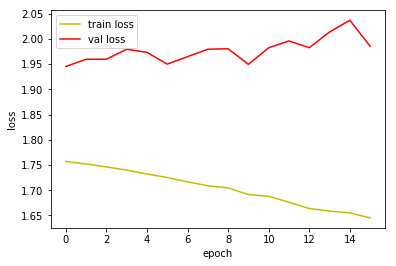

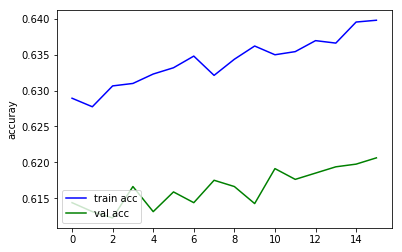

In [0]:
import pickle

hist = model.history

with open("/content/drive/My Drive/Colab Notebooks/data/LSTM_survival_time_0828_mod_2_hist.txt", "wb") as f:
  pickle.dump(hist, f)

loaded_hist = None

with open("/content/drive/My Drive/Colab Notebooks/data/LSTM_survival_time_0828_mod_2_hist.txt", "rb") as f:
  loaded_hist = pickle.load(f)
  
# 저장한 histroy file을 load하여 시각화!

hist = loaded_hist

import matplotlib.pyplot as plt

%matplotlib inline

fig, loss_ax = plt.subplots()
fig2, acc_ax = plt.subplots()

# acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# Many to Many : 2

In [0]:
tf.reset_default_graph()

K.clear_session()

model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(time_step, input_dim)))
model.add(Dropout(0.3))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(ylabel_dim, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 28, 64)            34816     
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 28, 64)            33024     
_________________________________________________________________
dropout_2 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1792)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                114752    
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)               

In [0]:
model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_test,y_test))

model.save("/content/drive/My Drive/Colab Notebooks/data/LSTM_survival_time_0828_2.h5")

Train on 30000 samples, validate on 10000 samples
Epoch 1/20
30000/30000 [==============================] - 31s 1ms/step - loss: 4.0525 - acc: 0.5446 - val_loss: 3.9309 - val_acc: 0.5522
Epoch 2/20
30000/30000 [==============================] - 30s 992us/step - loss: 3.8189 - acc: 0.5491 - val_loss: 3.7047 - val_acc: 0.5522
Epoch 3/20
30000/30000 [==============================] - 30s 986us/step - loss: 3.6015 - acc: 0.5491 - val_loss: 3.4941 - val_acc: 0.5522
Epoch 4/20
30000/30000 [==============================] - 30s 985us/step - loss: 3.3999 - acc: 0.5491 - val_loss: 3.2991 - val_acc: 0.5522
Epoch 5/20
14080/30000 [=============>................] - ETA: 13s - loss: 3.2662 - acc: 0.5447

KeyboardInterrupt: ignored

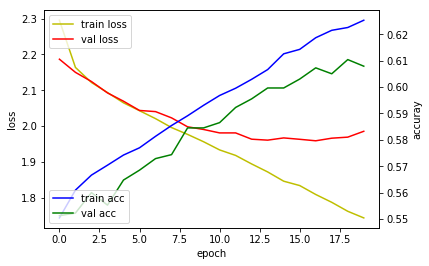

In [0]:
hist = model.history

import matplotlib.pyplot as plt

%matplotlib inline

fig, loss_ax = plt.subplots()
# fig2, acc_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

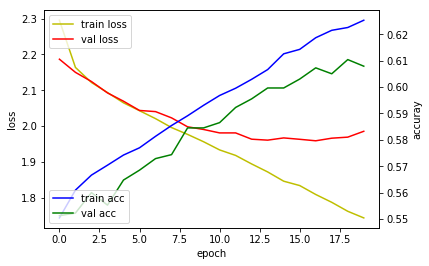

In [0]:
import pickle

with open("/content/drive/My Drive/Colab Notebooks/data/LSTM_survival_time_0828_2_hist.txt", "wb") as f:
  pickle.dump(hist, f)

loaded_hist = None

with open("/content/drive/My Drive/Colab Notebooks/data/LSTM_survival_time_0828_2_hist.txt", "rb") as f:
  loaded_hist = pickle.load(f)
  
# 저장한 histroy file을 load하여 시각화!

loaded_hist = model.history

import matplotlib.pyplot as plt

%matplotlib inline

fig, loss_ax = plt.subplots()
# fig2, acc_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# M to M : 3

In [0]:
tf.reset_default_graph()

K.clear_session()

model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape=(time_step, input_dim)))
model.add(Dropout(0.3))
model.add(LSTM(256, return_sequences=True))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(ylabel_dim, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 28, 256)           315392    
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 256)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 28, 256)           525312    
_________________________________________________________________
dropout_2 (Dropout)          (None, 28, 256)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7168)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 7168)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               1835264   
__________

In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

model_path = "/content/drive/My Drive/Colab Notebooks/data/LSTM_survival_time_0828_3.h5"

cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
cb_es = EarlyStopping(monitor='val_loss', patience=15)

model.fit(x_train, y_train, batch_size=128, epochs=80, validation_data=(x_test,y_test), callbacks=[cb_checkpoint, cb_es])

Train on 32000 samples, validate on 8000 samples
Epoch 1/80
32000/32000 [==============================] - 34s 1ms/step - loss: 2.3967 - acc: 0.5435 - val_loss: 2.1866 - val_acc: 0.5489

Epoch 00001: val_loss improved from inf to 2.18657, saving model to /content/drive/My Drive/Colab Notebooks/data/LSTM_survival_time_0828_3.h5
Epoch 2/80
32000/32000 [==============================] - 32s 1ms/step - loss: 2.2079 - acc: 0.5567 - val_loss: 2.1344 - val_acc: 0.5557

Epoch 00002: val_loss improved from 2.18657 to 2.13441, saving model to /content/drive/My Drive/Colab Notebooks/data/LSTM_survival_time_0828_3.h5
Epoch 3/80
32000/32000 [==============================] - 32s 999us/step - loss: 2.1572 - acc: 0.5640 - val_loss: 2.1052 - val_acc: 0.5611

Epoch 00003: val_loss improved from 2.13441 to 2.10524, saving model to /content/drive/My Drive/Colab Notebooks/data/LSTM_survival_time_0828_3.h5
Epoch 4/80
32000/32000 [==============================] - 32s 1ms/step - loss: 2.1287 - acc: 0.5670 -

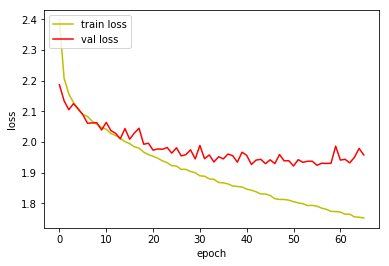

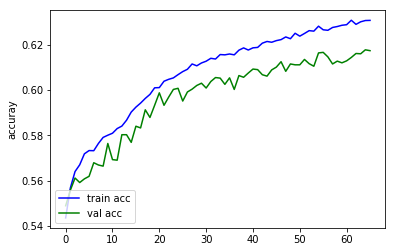

In [0]:
model_json = model.to_json()
with open("/content/drive/My Drive/Colab Notebooks/data/LSTM_survival_time_0828_3.json", "w") as json_file : 
    json_file.write(model_json)

import pickle

hist = model.history

with open("/content/drive/My Drive/Colab Notebooks/data/LSTM_survival_time_0828_mod_3_hist.txt", "wb") as f:
  pickle.dump(hist, f)

loaded_hist = None

with open("/content/drive/My Drive/Colab Notebooks/data/LSTM_survival_time_0828_mod_3_hist.txt", "rb") as f:
  loaded_hist = pickle.load(f)
  
# 저장한 histroy file을 load하여 시각화!

hist = loaded_hist

import matplotlib.pyplot as plt

%matplotlib inline

fig, loss_ax = plt.subplots()
fig2, acc_ax = plt.subplots()

# acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# paper

In [0]:
import pandas as pd
import numpy as np
from keras.layers import *
from keras.models import *
import keras.backend as K
import keras
import tensorflow as tf

tf.reset_default_graph()

K.clear_session()

model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(time_step, input_dim)))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(ylabel_dim, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 28, 64)            29696     
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 64)            256       
_________________________________________________________________
lstm_2 (LSTM)                (None, 28, 64)            33024     
_________________________________________________________________
dropout_2 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 64)            256       
_________________________________________________________________
lstm_3 (LSTM)                (None, 28, 64)            33024     
__________

In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

model_path = "/content/drive/My Drive/Colab Notebooks/data/LSTM_survival_time_0828_4.h5"

cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
cb_es = EarlyStopping(monitor='val_loss', patience=15)

model.fit(x_train, y_train, batch_size=64, epochs=80, validation_data=(x_test,y_test), callbacks=[cb_checkpoint, cb_es])

Train on 32000 samples, validate on 8000 samples
Epoch 1/80
32000/32000 [==============================] - 157s 5ms/step - loss: 2.7390 - acc: 0.4921 - val_loss: 2.2166 - val_acc: 0.5389

Epoch 00001: val_loss improved from inf to 2.21663, saving model to /content/drive/My Drive/Colab Notebooks/data/LSTM_survival_time_0828_4.h5
Epoch 2/80
32000/32000 [==============================] - 151s 5ms/step - loss: 2.2589 - acc: 0.5529 - val_loss: 2.2279 - val_acc: 0.5456

Epoch 00002: val_loss did not improve from 2.21663
Epoch 3/80
32000/32000 [==============================] - 151s 5ms/step - loss: 2.2129 - acc: 0.5573 - val_loss: 2.1835 - val_acc: 0.5429

Epoch 00003: val_loss improved from 2.21663 to 2.18345, saving model to /content/drive/My Drive/Colab Notebooks/data/LSTM_survival_time_0828_4.h5
Epoch 4/80
32000/32000 [==============================] - 151s 5ms/step - loss: 2.1839 - acc: 0.5600 - val_loss: 2.1926 - val_acc: 0.5306

Epoch 00004: val_loss did not improve from 2.18345
Epoch

KeyboardInterrupt: ignored

In [0]:
model_json = model.to_json()
with open("/content/drive/My Drive/Colab Notebooks/data/LSTM_survival_time_0828_4.json", "w") as json_file : 
    json_file.write(model_json)

import pickle

hist = model.history

with open("/content/drive/My Drive/Colab Notebooks/data/LSTM_survival_time_0828_mod_4_hist.txt", "wb") as f:
  pickle.dump(hist, f)

loaded_hist = None

with open("/content/drive/My Drive/Colab Notebooks/data/LSTM_survival_time_0828_mod_4_hist.txt", "rb") as f:
  loaded_hist = pickle.load(f)
  
# 저장한 histroy file을 load하여 시각화!

hist = loaded_hist

import matplotlib.pyplot as plt

%matplotlib inline

fig, loss_ax = plt.subplots()
fig2, acc_ax = plt.subplots()

# acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# XGBoost

In [0]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [0]:
x_train_xgb, x_test_xgb, y_train_xgb, y_test_xgb = train_test_split(data, ytrain_time, test_size=0.2, random_state=42)

In [0]:
x_train_xgb.shape

(32000, 1428)

In [0]:
x_train_xgb.reshape(32000,-1).shape

(32000, 1428)

In [0]:
x_train_xgb = x_train_xgb.reshape(32000,-1)
x_test_xgb = x_test_xgb.reshape(8000,-1)

In [0]:
y_train_xgb

array([[44],
       [50],
       [64],
       ...,
       [64],
       [29],
       [29]])

In [0]:
xg_reg = xgb.XGBRegressor(learning_rate = 0.06, max_depth= 3, n_estimators = 350, random_state= 0)

In [0]:
xg_reg.fit(x_train_xgb,y_train_xgb)

[07:55:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.06, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=350,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
xg_reg.score(x_train_xgb, y_train_xgb)

0.4608649280074435

In [0]:
xg_reg.score(x_test_xgb, y_test_xgb)

0.4202441497481315

In [0]:
x_test_xgb.shape

(32000, 357)

In [0]:
y_test_xgb.shape

(8000, 1)

# model 저장

In [0]:
rtdir = '/content/drive/My Drive/Colab Notebooks/data'

import pickle
pickle.dump(xg_reg, open(rtdir + "/0829_xgb_time.pickle.dat", "wb"))

In [0]:
y_train.shape

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Model for Survival time : Auto Regressive

In [0]:
data.shape

(40000, 28, 51)

In [0]:
train_label_time.head()

,acc_id,survival_time
22410,2,64
12651,5,60
5494,8,64
6811,17,64
16854,20,64


In [0]:
train_label_money.head()

,acc_id,amount_spent
22410,2,0.000000
12651,5,0.000000
5494,8,0.020310
6811,17,0.070642
16854,20,0.052137


In [0]:
train_payment = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/train_payment.csv")
train_payment.head()

,day,acc_id,amount_spent
0,18,27835,0.826123
1,23,27835,0.011735
2,27,27835,0.035204
3,17,12351,0.528062
4,11,125437,0.633674


In [0]:
day_filled_train.groupby('acc_id')['amount_spent'].mean()
# 요 값이 0이 아닌걸로만 하기?

acc_id
2         0.000000
5         0.000000
8         0.050166
17        0.000000
20        0.032019
21        0.096266
31        0.000000
38        0.225348
41        0.001257
43        0.132015
50        0.000000
53        0.017895
54        0.000000
59        0.000000
62        0.153264
63        0.062864
65        0.000000
66        0.012866
67        0.176398
69        0.012447
75        0.000000
76        0.029504
77        0.029504
79        0.000000
81        0.067223
86        0.000000
91        0.180798
92        0.000000
97        0.000000
98        0.178409
            ...   
130383    0.000000
130384    0.000000
130386    0.016722
130390    0.183774
130391    0.056452
130392    0.096392
130398    0.005029
130401    0.073635
130403    0.000000
130405    0.010477
130408    0.000000
130411    0.228701
130413    0.000000
130414    0.039395
130415    0.068774
130416    0.000000
130420    0.000419
130433    0.000419
130434    0.200496
130445    0.000000
130447    0.114832
13044

In [0]:
day_filled_train = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/day_filled_train_fill0.csv")

## auto regressive model을 만들기 위해 필요한 feature:
### 각 acc_id, day 당 접속여부 True/False(1/0)
### 각 acc_id, day 당 사용한 돈의 양

In [0]:
day_filled_train.head(40)
day_filled_train.drop(columns='Unnamed: 0', inplace=True)

In [0]:
# 이미 index의 총 갯수는 40000 * 28로 되어있음
# 즉, playtime = 0 이면 이 그 날에 접속하지 않은 계정!
# day_filled_train.info()

In [0]:
day_filled_train['isplayed'] = np.where(day_filled_train['playtime']!=0,1.,0.)
# day_filled_train['isplayed'] = day_filled_train['isplayed'].astype('category')
# categorial data로 변환

In [0]:
# train_played_label = day_filled_train[['acc_id','day','isplayed']]
# train_played_label.head(28)

In [0]:
day_filled_train.shape

(1120000, 54)

In [0]:
day_filled_train.head()

,acc_id,day,class_0,class_1,class_2,class_3,class_4,class_5,class_6,class_7,etc_cnt,num_opponent,pledge_cnt,random_attacker_cnt,random_defender_cnt,same_pledge_cnt,temp_cnt,isMajorClass,avg_play_rate_per_pledge,char_id,combat_char_cnt,combat_play_time,p_etc_cnt,non_combat_play_time,play_char_cnt,pledge_combat_cnt,p_random_attacker_cnt,p_random_defender_cnt,p_same_pledge_cnt,p_temp_cnt,total_combat_cnt_per_pledge,total_item_price,time_bin_0,time_bin_1,time_bin_2,time_bin_3,type_0,type_1,death,enchant_count,exp_recovery,fishing,game_money_change,npc_kill,party_exp,playtime,private_shop,quest_exp,revive,rich_monster,solo_exp,total_exp,fishing_prop,isplayed
0,2,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.702263e-06,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.024810,0.0,0.0,2.703457,2.462447,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.833293e-03,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.044201,0.0,0.0,3.363522,3.149118,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.138403e-06,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.451317,0.0,0.0,3.370544,3.183447,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.007230,0.0,0.0,3.370544,3.131992,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.821335e-09,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.015398,0.0,0.0,3.370544,3.135698,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [0]:
day_filled_train = pd.merge(day_filled_train,train_payment,on=['acc_id','day'],how='left').fillna(0)
day_filled_train.tail(10)
# 각 day에 사용한 돈 합쳐주기

,acc_id,day,class_0,class_1,class_2,class_3,class_4,class_5,class_6,class_7,etc_cnt,num_opponent,pledge_cnt,random_attacker_cnt,random_defender_cnt,same_pledge_cnt,temp_cnt,isMajorClass,avg_play_rate_per_pledge,char_id,combat_char_cnt,combat_play_time,p_etc_cnt,non_combat_play_time,play_char_cnt,pledge_combat_cnt,p_random_attacker_cnt,p_random_defender_cnt,p_same_pledge_cnt,p_temp_cnt,total_combat_cnt_per_pledge,total_item_price,time_bin_0,time_bin_1,time_bin_2,time_bin_3,type_0,type_1,death,enchant_count,exp_recovery,fishing,game_money_change,npc_kill,party_exp,playtime,private_shop,quest_exp,revive,rich_monster,solo_exp,total_exp,fishing_prop,isplayed,amount_spent
1119990,130473,19,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.788281,0.686901,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.21894,96346.0,1.624019,3.646361,4.154942,0.0,1.948823,5.780704,0.000000,0.000000,8.752889,0.494415,0.164401,8.974298e-04,0.0,0.0,0.0,1.0,0.0,1.0,0.000000,0.0,0.0,1.854111,-0.680876,0.162549,0.000883,2.502160,0.0,0.000108,0.000000,0.0,0.001044,0.002035,0.741004,1.0,0.281633
1119991,130473,20,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10.472872,5.985854,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.21894,96346.0,1.443573,3.033383,2.031462,0.0,1.768377,3.329278,3.744033,0.071531,1.591434,1.483246,0.164401,4.487149e-07,0.0,0.0,0.0,1.0,0.0,1.0,0.245883,0.0,0.0,2.184455,0.217189,0.192288,0.000200,3.358840,0.0,0.000434,0.247337,1.0,0.001373,0.002006,0.650360,1.0,0.211225
1119992,130473,21,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,4.612051,4.236160,0.0,0.000000,0.0,0.479728,0.5,0.21894,96346.0,1.479662,3.227169,3.220611,0.0,1.876645,4.172525,1.258770,0.000000,0.000000,0.692181,0.164401,2.243574e-02,0.0,0.0,0.0,1.0,0.0,1.0,0.000000,0.0,0.0,1.327152,0.581836,0.046974,0.000091,3.197335,0.0,0.000108,0.000000,0.0,0.001433,0.001632,0.415081,1.0,0.880103
1119993,130473,22,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.450446,1.373803,0.770211,0.0,0.000000,0.0,0.000000,0.5,0.21894,96346.0,1.407483,3.076009,3.581602,0.0,1.840555,2.584379,0.000000,0.000000,0.000000,0.692181,0.164401,4.487149e-02,0.0,0.0,0.0,1.0,0.0,1.0,0.000000,0.0,0.0,0.000000,-0.750887,0.061843,0.000597,0.854339,0.0,0.000108,0.000000,0.0,0.000230,0.000936,0.000000,1.0,0.000000
1119994,130473,23,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.112612,2.747605,1.989712,0.0,1.183064,0.0,0.000000,0.0,0.21894,96346.0,1.479662,2.631913,1.061740,0.0,1.732287,2.546133,4.970527,0.858376,3.182869,1.285480,0.164401,4.487149e-02,0.0,0.0,0.0,1.0,0.0,1.0,0.000000,0.0,0.0,0.466610,0.162348,0.442364,0.000775,1.610371,0.0,0.000163,0.000000,0.0,0.000964,0.001901,0.289753,1.0,0.070408
1119995,130473,24,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.21894,96346.0,1.587930,3.435317,2.095167,0.0,1.948823,3.209074,0.742351,0.000000,0.795717,1.384363,0.164401,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,2.874988,-0.064126,0.422087,0.000000,3.328412,0.0,0.000217,0.000000,0.0,0.002497,0.002714,0.863772,1.0,0.000000
1119996,130473,25,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,1.079416,1.026948,0.0,0.000000,0.0,0.479728,0.0,0.21894,96346.0,1.551841,3.890417,2.555254,0.0,1.876645,3.615217,3.582653,0.000000,0.000000,1.186597,0.164401,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,2.143104,-0.068478,0.364637,0.000123,3.368203,0.0,0.000108,0.000000,1.0,0.001818,0.002049,0.636275,1.0,0.000000
1119997,130473,26,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.225223,5.985854,7.317004,0.0,0.000000,0.0,0.000000,0.0,0.21894,96346.0,1.587930,3.636979,4.197411,0.0,1.804466,6.980920,0.000000,0.000000,3.978586,0.593298,0.164401,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.983534,0.0,0.0,0.842675,-0.043354,0.399107,0.000163,1.776557,0.0,0.000163,0.989348,0.0,0.001044,0.001370,0.474330,1.0,0.000000
1119998,130473,27,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.21894,96346.0,1.443573,3.211068,1.833271,0.0,1.840555,3.771846,1.258770,0.000000,0.795717,1.186597,0.164401,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,

In [0]:
day_filled_train.head()

,acc_id,day,class_0,class_1,class_2,class_3,class_4,class_5,class_6,class_7,etc_cnt,num_opponent,pledge_cnt,random_attacker_cnt,random_defender_cnt,same_pledge_cnt,temp_cnt,isMajorClass,avg_play_rate_per_pledge,char_id,combat_char_cnt,combat_play_time,p_etc_cnt,non_combat_play_time,play_char_cnt,pledge_combat_cnt,p_random_attacker_cnt,p_random_defender_cnt,p_same_pledge_cnt,p_temp_cnt,total_combat_cnt_per_pledge,total_item_price,time_bin_0,time_bin_1,time_bin_2,time_bin_3,type_0,type_1,death,enchant_count,exp_recovery,fishing,game_money_change,npc_kill,party_exp,playtime,private_shop,quest_exp,revive,rich_monster,solo_exp,total_exp,fishing_prop,isplayed,amount_spent
0,2,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.702263e-06,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.024810,0.0,0.0,2.703457,2.462447,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.833293e-03,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.044201,0.0,0.0,3.363522,3.149118,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.138403e-06,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.451317,0.0,0.0,3.370544,3.183447,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.007230,0.0,0.0,3.370544,3.131992,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.821335e-09,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.015398,0.0,0.0,3.370544,3.135698,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [0]:
data_28 = day_filled_train.drop(columns=['acc_id','day'])
data_28.head()

,class_0,class_1,class_2,class_3,class_4,class_5,class_6,class_7,etc_cnt,num_opponent,pledge_cnt,random_attacker_cnt,random_defender_cnt,same_pledge_cnt,temp_cnt,isMajorClass,avg_play_rate_per_pledge,char_id,combat_char_cnt,combat_play_time,p_etc_cnt,non_combat_play_time,play_char_cnt,pledge_combat_cnt,p_random_attacker_cnt,p_random_defender_cnt,p_same_pledge_cnt,p_temp_cnt,total_combat_cnt_per_pledge,total_item_price,time_bin_0,time_bin_1,time_bin_2,time_bin_3,type_0,type_1,death,enchant_count,exp_recovery,fishing,game_money_change,npc_kill,party_exp,playtime,private_shop,quest_exp,revive,rich_monster,solo_exp,total_exp,fishing_prop,isplayed,amount_spent
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.702263e-06,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.024810,0.0,0.0,2.703457,2.462447,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.833293e-03,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.044201,0.0,0.0,3.363522,3.149118,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.138403e-06,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.451317,0.0,0.0,3.370544,3.183447,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.007230,0.0,0.0,3.370544,3.131992,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.821335e-09,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.015398,0.0,0.0,3.370544,3.135698,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [0]:
from sklearn.preprocessing import MinMaxScaler
data_28['isplayed'] = data_28['isplayed'].astype('category')

In [0]:
# data_28.info()

In [0]:
data_28_val = MinMaxScaler().fit_transform(data_28)
data_28_val.shape

(1120000, 53)

In [0]:
data_28_val[0]

array([0.00000000e+00, 4.40528634e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.35720463e-07, 1.47058824e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.44927536e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.66764456e-01, 0.00000000e+00, 0.00000000e+00, 7.34265734e-01,
       3.81254379e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00])

In [0]:
data_28_val = data_28_val.reshape((40000,28,-1))

In [0]:
data_28_val[0,0,:] # data 확인

array([0.00000000e+00, 4.40528634e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.35720463e-07, 1.47058824e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.44927536e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.66764456e-01, 0.00000000e+00, 0.00000000e+00, 7.34265734e-01,
       3.81254379e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00])

In [0]:
data_28_val[0].shape

(28, 53)

In [0]:
# 만들어야 할 output data shape : (22 * 40000, 7) : 슬라이딩 해서 늘려줘야 함

time_length = 7
data_7_val = []
for val in data_28_val:
  tmp = []
  for i in range(data_28_val.shape[1]-time_length+1):
    tmp.append(val[i:i+time_length,:])
  data_7_val.append(tmp)
np.shape(data_7_val)

(40000, 22, 7, 53)

In [0]:
data_7_val = np.array(data_7_val)

In [0]:
data_7_val[0].shape

(22, 7, 53)

In [0]:
data_7_val_21 = data_7_val[:,:-1,:,:]

In [0]:
data_7_val_21.shape # 이게 input data

(40000, 21, 7, 53)

In [0]:
data_7_val[:,1:,:,[-1]].shape # ylabel

(40000, 21, 7, 1)

In [0]:
pd.DataFrame(data_7_val[0,0].reshape(-1,53), columns=data_28.columns)

,class_0,class_1,class_2,class_3,class_4,class_5,class_6,class_7,etc_cnt,num_opponent,pledge_cnt,random_attacker_cnt,random_defender_cnt,same_pledge_cnt,temp_cnt,isMajorClass,avg_play_rate_per_pledge,char_id,combat_char_cnt,combat_play_time,p_etc_cnt,non_combat_play_time,play_char_cnt,pledge_combat_cnt,p_random_attacker_cnt,p_random_defender_cnt,p_same_pledge_cnt,p_temp_cnt,total_combat_cnt_per_pledge,total_item_price,time_bin_0,time_bin_1,time_bin_2,time_bin_3,type_0,type_1,death,enchant_count,exp_recovery,fishing,game_money_change,npc_kill,party_exp,playtime,private_shop,quest_exp,revive,rich_monster,solo_exp,total_exp,fishing_prop,isplayed,amount_spent
0,0.0,0.004405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.357205e-07,0.014706,0.0,0.000000,0.000000,0.014493,0.000000,0.0,0.0,0.0,0.0,0.566764,0.0,0.0,0.734266,0.381254,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.004405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.150442e-03,0.000000,0.0,0.006024,0.000000,0.000000,0.002703,0.0,0.0,0.0,0.0,0.562086,0.0,0.0,0.913541,0.487570,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.004405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.245159e-07,0.000000,0.0,0.006024,0.000000,0.004831,0.000000,0.0,0.0,0.0,0.0,0.565468,0.0,0.0,0.915448,0.492885,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.004405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.564431,0.0,0.0,0.915448,0.484918,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.004405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.592038e-10,0.000000,0.0,0.000000,0.003774,0.004831,0.000000,0.0,0.0,0.0,0.0,0.564482,0.0,0.0,0.915448,0.485492,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.004405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.564439,0.0,0.0,0.915448,0.485377,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.004405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.828122e-07,0.004902,0.0,0.000000,0.000000,0.004831,0.000000,0.0,0.0,0.0,0.0,0.563623,0.0,0.0,0.915448,0.485420,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [0]:
pd.DataFrame(data_7_val[0,1].reshape(-1,53), columns=data_28.columns)

,class_0,class_1,class_2,class_3,class_4,class_5,class_6,class_7,etc_cnt,num_opponent,pledge_cnt,random_attacker_cnt,random_defender_cnt,same_pledge_cnt,temp_cnt,isMajorClass,avg_play_rate_per_pledge,char_id,combat_char_cnt,combat_play_time,p_etc_cnt,non_combat_play_time,play_char_cnt,pledge_combat_cnt,p_random_attacker_cnt,p_random_defender_cnt,p_same_pledge_cnt,p_temp_cnt,total_combat_cnt_per_pledge,total_item_price,time_bin_0,time_bin_1,time_bin_2,time_bin_3,type_0,type_1,death,enchant_count,exp_recovery,fishing,game_money_change,npc_kill,party_exp,playtime,private_shop,quest_exp,revive,rich_monster,solo_exp,total_exp,fishing_prop,isplayed,amount_spent
0,0.0,0.004405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.150442e-03,0.000000,0.0,0.006024,0.000000,0.000000,0.002703,0.0,0.0,0.0,0.0,0.562086,0.0,0.0,0.913541,0.487570,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.004405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.245159e-07,0.000000,0.0,0.006024,0.000000,0.004831,0.000000,0.0,0.0,0.0,0.0,0.565468,0.0,0.0,0.915448,0.492885,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.004405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.564431,0.0,0.0,0.915448,0.484918,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.004405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.592038e-10,0.000000,0.0,0.000000,0.003774,0.004831,0.000000,0.0,0.0,0.0,0.0,0.564482,0.0,0.0,0.915448,0.485492,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.004405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.564439,0.0,0.0,0.915448,0.485377,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.004405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.828122e-07,0.004902,0.0,0.000000,0.000000,0.004831,0.000000,0.0,0.0,0.0,0.0,0.563623,0.0,0.0,0.915448,0.485420,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.004405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.564432,0.0,0.0,0.752066,0.393938,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [0]:
# 정리하면
data_7_val = data_7_val.reshape(-1,7,53)

In [0]:
pd.DataFrame(data_7_val[233439], columns=data_28.columns)

,class_0,class_1,class_2,class_3,class_4,class_5,class_6,class_7,etc_cnt,num_opponent,pledge_cnt,random_attacker_cnt,random_defender_cnt,same_pledge_cnt,temp_cnt,isMajorClass,avg_play_rate_per_pledge,char_id,combat_char_cnt,combat_play_time,p_etc_cnt,non_combat_play_time,play_char_cnt,pledge_combat_cnt,p_random_attacker_cnt,p_random_defender_cnt,p_same_pledge_cnt,p_temp_cnt,total_combat_cnt_per_pledge,total_item_price,time_bin_0,time_bin_1,time_bin_2,time_bin_3,type_0,type_1,death,enchant_count,exp_recovery,fishing,game_money_change,npc_kill,party_exp,playtime,private_shop,quest_exp,revive,rich_monster,solo_exp,total_exp,fishing_prop,isplayed,amount_spent
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.564447,0.000000,0.000000,0.000000,0.0,0.0000,0.00000,0.000,0.000000,0.000000,0.0,0.0,0.000000
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.564447,0.000000,0.000000,0.000000,0.0,0.0000,0.00000,0.000,0.000000,0.000000,0.0,0.0,0.000000
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.564447,0.000000,0.000000,0.000000,0.0,0.0000,0.00000,0.000,0.000000,0.000000,0.0,0.0,0.000000
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.564447,0.000000,0.000000,0.000000,0.0,0.0000,0.00000,0.000,0.000000,0.000000,0.0,0.0,0.000000
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.564447,0.000000,0.000000,0.000000,0.0,0.0000,0.00000,0.000,0.000000,0.000000,0.0,0.0,0.000000
5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.564447,0.000000,0.000000,0.000000,0.0,0.0000,0.00000,0.000,0.000000,0.000000,0.0,0.0,0.000000
6,0.015873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007892,0.032374,0.004306,0.0,0.0,0.026316,0.0,0.0,0.03514,0.020346,0.05597,0.019172,0.040596,0.0,0.031098,0.002762,0.0,0.000975,0.00641,0.006222,0.000392,0.000133,0.0,0.0,0.03012,0.003774,0.014493,0.008108,0.00444,0.0,0.0,0.0,0.564454,0.021601,0.018458,0.274634,0.0,0.1647,0.00444,0.125,0.092931,0.208787,0.0,1.0,0.045005


In [0]:
# time_step = 7을 위한 input dataset 생성!
data_7_val.shape

(880000, 7, 53)

### outputdata (mean)

In [0]:
# label
data_7_val[:,:,[-1]].shape

(880000, 7, 1)

In [0]:
pd.DataFrame(data_7_val[0,:,[-1]])

,0,1,2,3,4,5,6
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
data_7_val[:,:,[-1]].mean(axis=-1).shape

(880000, 7)

In [0]:
label_7 = data_7_val[:,:,[-1]].mean(axis=-1)

In [0]:
# label 생성
label_7.shape

(880000, 7)

### output data 생성완료

In [0]:
data_7_val[:,1:,:,-1].shape # ylabel

(40000, 21, 7)

### input data

In [0]:
data_7_val_21 = data_7_val[:,:-1,:,:]

In [0]:
data_7_val_21.shape

(40000, 21, 7, 53)

In [0]:
data_7_val_21 = data_7_val_21.reshape(-1,7,53)

In [0]:
data_7_val_21.shape

(840000, 7, 53)

### output data

In [0]:
data_7_val.shape

(40000, 22, 7, 53)

In [0]:
ydata = data_7_val[:,1:,-1,-1]

In [0]:
ydata.shape

(40000, 21)

In [0]:
label_7 = ydata.reshape(-1,1)

In [0]:
label_7.shape

(840000, 1)

### model for avarage usage(money) 생성

In [0]:
xdata = data_7_val_21
ydata = label_7

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(xdata, ydata, test_size=0.2)

In [0]:
print(x_train.shape, y_train.shape)

(672000, 7, 53) (672000, 1)


In [0]:
from keras.layers import *
from keras.models import *
import tensorflow as tf
import keras.backend as K

In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

model_path = "/content/drive/My Drive/Colab Notebooks/data/LSTM_money_0830.h5"

cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
cb_es = EarlyStopping(monitor='val_loss', patience=5)

In [0]:
tf.reset_default_graph()
K.clear_session()
time_step = 7
input_dim = 53
ylabel_dim = y_train.shape[1]

model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape=(time_step, input_dim)))
model.add(Dropout(0.3))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(ylabel_dim, activation='relu'))
model.compile(loss='mse', optimizer='rmsprop', metrics=['acc'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 7, 256)            317440    
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 256)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 7, 128)            197120    
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 128)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 896)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               229632    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)              

In [0]:
model.fit(x_train, y_train, batch_size=256, epochs=15, verbose=1, callbacks=[cb_checkpoint, cb_es], validation_data=(x_test,y_test))
# 이게 accuracy가 이따위로 나오는게 왠지 다 0으로 그냥 수렴하는건 아닌지 걱정....

W0830 04:48:23.774450 140226911344512 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 672000 samples, validate on 168000 samples
Epoch 1/15
672000/672000 [==============================] - 118s 175us/step - loss: 5.3139e-04 - acc: 0.9419 - val_loss: 5.1263e-04 - val_acc: 0.9417

Epoch 00001: val_loss improved from inf to 0.00051, saving model to /content/drive/My Drive/Colab Notebooks/data/LSTM_money_0830.h5
Epoch 2/15
672000/672000 [==============================] - 113s 169us/step - loss: 5.3138e-04 - acc: 0.9419 - val_loss: 5.1263e-04 - val_acc: 0.9417

Epoch 00002: val_loss did not improve from 0.00051
Epoch 3/15
178176/672000 [======>.......................] - ETA: 1:18 - loss: 5.1602e-04 - acc: 0.9425

KeyboardInterrupt: ignored

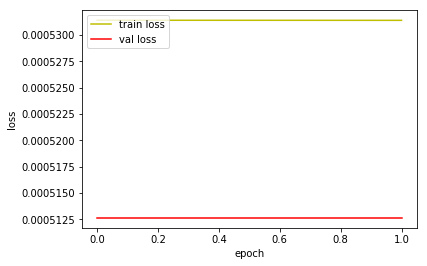

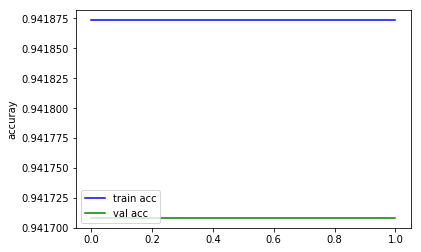

In [0]:
model_json = model.to_json()
with open("/content/drive/My Drive/Colab Notebooks/data/LSTM_money_0830.json", "w") as json_file : 
    json_file.write(model_json)

import pickle

hist = model.history

with open("/content/drive/My Drive/Colab Notebooks/data/LSTM_money_0830_hist.txt", "wb") as f:
  pickle.dump(hist, f)

loaded_hist = None

with open("/content/drive/My Drive/Colab Notebooks/data/LSTM_money_0830_hist.txt", "rb") as f:
  loaded_hist = pickle.load(f)
  
# 저장한 histroy file을 load하여 시각화!

hist = loaded_hist

import matplotlib.pyplot as plt

%matplotlib inline

fig, loss_ax = plt.subplots()
fig2, acc_ax = plt.subplots()

# acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [0]:
mypred = model.predict(x_test)

In [0]:
mypred.mean()

0.0

0을 보간하지않고 그대로 regression을 수행했더니 전부 0으로 수렴해버렸다

젠장...

# model for predicting money : 데이터 보간 후




In [0]:
import numpy as np
import pandas as pd

train_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/0830-15-train.csv")

In [0]:
len(train_data.columns)

52

In [0]:
train_data.head(10)

,acc_id,day,c_cnt_class0,c_cnt_class1,c_cnt_class2,c_cnt_class3,c_cnt_class4,c_cnt_class5,c_cnt_class6,c_cnt_class7,c_etc_cnt,c_num_opponent,c_pledge_cnt,c_random_attacker_cnt,c_random_defender_cnt,c_same_pledge_cnt,c_temp_cnt,isMajorClass,avg_play_rate_rank_per_p,p_c_char_cnt,p_c_sum_play_time,p_etc_cnt,p_non_c_sum_play_time,p_play_char_cnt,p_c_cnt,p_random_attacker_cnt,p_random_defender_cnt,p_same_pledge_cnt,p_temp_cnt,tot_c_rank_per_p,tot_item_price,t_time_bin_0,t_time_bin_1,t_time_bin_2,t_time_bin_3,t_type_0,t_type_1,a_death_cnt,a_enchant_count,a_exp_recovery_cnt,a_fish,a_money_change,a_npc_kill,a_party_exp,a_playtime,a_private_shop,a_quest_exp,a_revive_cnt,a_boss_monster,a_solo_exp,tot_exp,fishing_prop
0,2,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.786882e-06,5.0,0.0,1.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,1.024810,0.0,0.0,2.703457,2.462447,0.0,0.0,0.0,0.0,0.0,0.0
1,2,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.703948e-03,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,-1.044201,0.0,0.0,3.363522,3.149118,0.0,0.0,0.0,0.0,0.0,0.0
2,2,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.138403e-06,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.451317,0.0,0.0,3.370544,3.183447,0.0,0.0,0.0,0.0,0.0,0.0
3,2,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.007230,0.0,0.0,3.370544,3.131992,0.0,0.0,0.0,0.0,0.0,0.0
4,2,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.821335e-09,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.015398,0.0,0.0,3.370544,3.135698,0.0,0.0,0.0,0.0,0.0,0.0
5,2,6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.241726e-09,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.003800,0.0,0.0,3.370544,3.134957,0.0,0.0,0.0,0.0,0.0,0.0
6,2,7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.433993e-06,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.364260,0.0,0.0,3.370544,3.135230,0.0,0.0,0.0,0.0,0.0,0.0
7,2,8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.006619,0.0,0.0,2.768995,2.544370,0.0,0.0,0.0,0.0,0.0,0.0
8,2,9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.525355e-10,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.010979,0.0,0.0,3.361181,3.072071,0.0,0.0,0.0,0.0,0.0,0.0
9,2,10,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.518198e-06,0.0,1.0,1.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,-0.182742,0.0,0.0,3.370544,3.145177,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
train_data.shape

(1120000, 52)

In [0]:
day_filled_train = train_data.copy()

In [0]:
colabdir = '/content/drive/My Drive/Colab Notebooks/'

df = pd.read_csv(colabdir+'data/day_filled_train_fill0.csv')

In [0]:
train_payment = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/train_payment.csv")
train_payment.head()

,day,acc_id,amount_spent
0,18,27835,0.826123
1,23,27835,0.011735
2,27,27835,0.035204
3,17,12351,0.528062
4,11,125437,0.633674


In [0]:
day_filled_train['isplayed'] = np.where(df['playtime']!=0,1.,0.)
# day_filled_train['isplayed'] = day_filled_train['isplayed'].astype('category')
# categorial data로 변환

day_filled_train = pd.merge(day_filled_train,train_payment,on=['acc_id','day'],how='left')

# amount_spent의 값을 id당 평균의 값으로 치환!
day_filled_train['amount_spent'] = day_filled_train.groupby('acc_id')['amount_spent'].transform(lambda x: x.fillna(x.mean()))
day_filled_train.fillna(0, inplace=True)

day_filled_train.tail(10)
# 각 day에 사용한 돈 합쳐주기

data_28 = day_filled_train.drop(columns=['acc_id','day'])
data_28.head()

from sklearn.preprocessing import MinMaxScaler
data_28['isplayed'] = data_28['isplayed'].astype('category')

data_28_val = MinMaxScaler().fit_transform(data_28)
data_28_val.shape

(1120000, 52)

글구 일단 아예 amount_spent = 0인거는 뺀 df를 만들어보자

In [0]:
day_filled_train[day_filled_train['amount_spent']!=0].head()

,acc_id,day,c_cnt_class0,c_cnt_class1,c_cnt_class2,c_cnt_class3,c_cnt_class4,c_cnt_class5,c_cnt_class6,c_cnt_class7,c_etc_cnt,c_num_opponent,c_pledge_cnt,c_random_attacker_cnt,c_random_defender_cnt,c_same_pledge_cnt,c_temp_cnt,isMajorClass,avg_play_rate_rank_per_p,p_c_char_cnt,p_c_sum_play_time,p_etc_cnt,p_non_c_sum_play_time,p_play_char_cnt,p_c_cnt,p_random_attacker_cnt,p_random_defender_cnt,p_same_pledge_cnt,p_temp_cnt,tot_c_rank_per_p,tot_item_price,t_time_bin_0,t_time_bin_1,t_time_bin_2,t_time_bin_3,t_type_0,t_type_1,a_death_cnt,a_enchant_count,a_exp_recovery_cnt,a_fish,a_money_change,a_npc_kill,a_party_exp,a_playtime,a_private_shop,a_quest_exp,a_revive_cnt,a_boss_monster,a_solo_exp,tot_exp,fishing_prop,isplayed,amount_spent
56,8,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.428571,1.425044,2.706699,5.719273,1.528905,0.000927,11.548582,0.193054,0.484142,0.429188,3.182869,4.647503,0.005523,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.732584,3.094180,0.0,0.463450,0.0,0.375125,0.000000,0.0,8.604148,8.979273,0.000000,1.0,1.056123
57,8,2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.400000,0.825033,1.984913,5.191779,1.451044,0.001158,7.001328,0.152987,0.774628,0.286125,3.978586,2.274310,0.004373,0.000044,2.0,0.0,0.0,0.0,0.0,2.0,0.000000,0.0,0.0,0.000000,-0.189772,4.770700,0.0,0.557076,0.0,0.006941,0.000000,0.0,3.798495,3.805436,0.000000,1.0,0.702322
58,8,3,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.400000,1.116558,2.273627,5.921167,1.649236,0.001274,8.408811,0.125667,3.744033,1.072970,2.387152,3.065374,0.004948,0.043876,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.526647,-0.527224,2.291910,0.0,1.182031,0.0,0.173523,0.000000,0.0,1.292998,1.466521,0.445545,1.0,0.702322
59,8,4,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.500000,1.205200,2.706699,6.479820,1.167914,0.000116,8.950151,0.078315,3.969966,2.145940,0.000000,3.856439,0.005427,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.012254,3.616297,0.0,0.348758,0.0,0.027764,0.000000,0.0,3.948986,3.976750,0.000000,1.0,0.702322
60,8,5,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.098129,0.0,0.0,0.0,0.0,0.479728,0.500000,0.913674,2.454074,5.850278,2.526941,0.003475,7.470489,0.107455,0.000000,0.357657,3.182869,4.251971,0.004852,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3.442369,0.0,0.0,0.614422,-0.006929,4.311778,0.0,1.460569,0.0,0.027764,3.462717,1.0,4.960461,4.988224,0.420673,1.0,0.702322


In [0]:
data_filled_train_wo_0 = day_filled_train[day_filled_train['amount_spent']!=0]

In [0]:
data_filled_train_wo_0.shape

(664328, 54)

In [0]:
data_28_wo0_val = df2NpArray(data_filled_train_wo_0)
data_28_wo0_val.shape

(664328, 52)

# 함수 : for data processing

In [0]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

def df2NpArray(df):
  df = df.drop(columns=['acc_id','day'])
  df['isplayed'] = df['isplayed'].astype('category')
  arr = MinMaxScaler().fit_transform(df)
  arr = np.array(arr)
  return arr

def shape28toN(npArr,time_length):
  num_features = npArr.shape[-1]
  npArr = npArr.reshape((-1,28,num_features))
  data_n_val = []
  for val in npArr:
    tmp = []
    for i in range(npArr.shape[1]-time_length+1):
      tmp.append(val[i:i+time_length,:])
    data_n_val.append(tmp)
  data_n_val = np.array(data_n_val)
#   data_n_val = data_n_val.reshape(-1,time_length,num_features)
  return data_n_val

# xdata와 ydata를 분리해주는 모델
# xdata : 1일~21일 까지 / time step 7인 데이터
# ydata : 2일~22일의 결과(money_spent)
def sepXY(npArr,time_length):
  num_features = npArr.shape[-1]
  xdata = npArr[:,:-1,:,:]
  xdata = xdata.reshape(-1,time_length,num_features)
  ydata = npArr[:,1:,-1,-1]
  ydata = ydata.reshape(-1,1)
  return xdata, ydata

In [0]:
data_7_wo0_val = shape28toN(data_28_wo0_val,7)
data_7_wo0_val.shape

(23726, 22, 7, 52)

In [0]:
data_7_val = shape28toN(data_28_val,7)
data_7_val.shape

(40000, 22, 7, 52)

## input / output data

In [0]:
xdata, ydata = sepXY(data_7_wo0_val,7)
print(xdata.shape, ydata.shape)
# 0뺀 모델은 잘 안됨 : acc 4%..?

(498246, 7, 52) (498246, 1)


In [0]:
xdata, ydata = sepXY(data_7_val,7)
print(xdata.shape, ydata.shape)

(840000, 7, 52) (840000, 1)


## model 생성 : sigmoid / binary_crossentropy

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(xdata, ydata, test_size=0.2)

print(x_train.shape, y_train.shape)

(672000, 7, 52) (672000, 1)


In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

model_path = "/content/drive/My Drive/Colab Notebooks/data/LSTM_money_0830.h5"

cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
cb_es = EarlyStopping(monitor='val_loss', patience=5)

In [0]:
from keras.layers import *
from keras.models import *
import tensorflow as tf
import keras.backend as K

tf.reset_default_graph()
K.clear_session()
time_step = 7
input_dim = xdata.shape[-1]
ylabel_dim = y_train.shape[1]

model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape=(time_step, input_dim)))
model.add(Dropout(0.3))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(ylabel_dim, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()

W0830 13:36:34.554657 140296336017280 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:107: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0830 13:36:34.598556 140296336017280 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:111: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0830 13:36:34.604961 140296336017280 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0830 13:36:34.606798 140296336017280 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W08

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 7, 256)            316416    
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 256)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 7, 128)            197120    
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 128)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 896)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               229632    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)              

In [0]:
model.fit(x_train, y_train, batch_size=256, epochs=3, verbose=1, callbacks=[cb_checkpoint, cb_es], validation_data=(x_test,y_test))

Train on 672000 samples, validate on 168000 samples
Epoch 1/3
672000/672000 [==============================] - 110s 164us/step - loss: 0.1165 - acc: 0.4069 - val_loss: 0.1160 - val_acc: 0.4069

Epoch 00001: val_loss did not improve from 0.11603
Epoch 2/3
672000/672000 [==============================] - 109s 162us/step - loss: 0.1164 - acc: 0.4069 - val_loss: 0.1160 - val_acc: 0.4069

Epoch 00002: val_loss improved from 0.11603 to 0.11602, saving model to /content/drive/My Drive/Colab Notebooks/data/LSTM_money_0830.h5
Epoch 3/3
672000/672000 [==============================] - 110s 164us/step - loss: 0.1163 - acc: 0.4069 - val_loss: 0.1160 - val_acc: 0.4069

Epoch 00003: val_loss improved from 0.11602 to 0.11597, saving model to /content/drive/My Drive/Colab Notebooks/data/LSTM_money_0830.h5


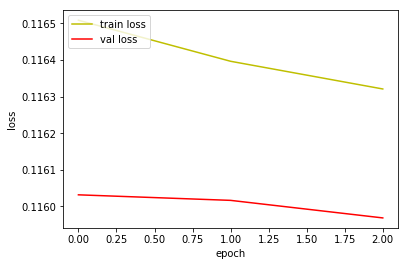

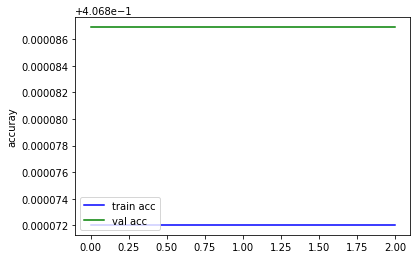

In [0]:
model_json = model.to_json()
with open("notification/archive/savecheckpoint/LSTM_money_0830_2.json", "w") as json_file : 
    json_file.write(model_json)

import pickle

hist = model.history

with open("notification/archive/savecheckpoint/LSTM_money_0830_2_hist.txt", "wb") as f:
  pickle.dump(hist, f)

loaded_hist = None

with open("notification/archive/savecheckpoint/LSTM_money_0830_2_hist.txt", "rb") as f:
  loaded_hist = pickle.load(f)
  
# 저장한 histroy file을 load하여 시각화!

hist = loaded_hist

import matplotlib.pyplot as plt

%matplotlib inline

fig, loss_ax = plt.subplots()
fig2, acc_ax = plt.subplots()

# acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

## model 생성 : linear / mse

In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

model_path = "notification/archive/savecheckpoint/LSTM_money_0830_mse.h5"

cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
cb_es = EarlyStopping(monitor='val_loss', patience=5)

In [0]:
from keras.layers import *
from keras.models import *
import tensorflow as tf
import keras.backend as K

tf.reset_default_graph()
K.clear_session()
time_step = 7
input_dim = xdata.shape[-1]
ylabel_dim = y_train.shape[1]

model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape=(time_step, input_dim)))
model.add(Dropout(0.3))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(ylabel_dim, activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['acc'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 7, 256)            316416    
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 256)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 7, 128)            197120    
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 128)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 896)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               229632    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)              

In [0]:
model.fit(x_train, y_train, batch_size=256, epochs=3, verbose=1, callbacks=[cb_checkpoint, cb_es], validation_data=(x_test,y_test))

Train on 672000 samples, validate on 168000 samples
Epoch 1/3
672000/672000 [==============================] - 111s 165us/step - loss: 2.7914e-04 - acc: 0.4069 - val_loss: 2.3655e-04 - val_acc: 0.4069

Epoch 00001: val_loss improved from 0.00025 to 0.00024, saving model to /content/drive/My Drive/Colab Notebooks/data/LSTM_money_0830_mse.h5
Epoch 2/3
672000/672000 [==============================] - 115s 171us/step - loss: 2.7563e-04 - acc: 0.4069 - val_loss: 2.4577e-04 - val_acc: 0.4069

Epoch 00002: val_loss did not improve from 0.00024
Epoch 3/3
672000/672000 [==============================] - 117s 174us/step - loss: 2.7061e-04 - acc: 0.4069 - val_loss: 2.3818e-04 - val_acc: 0.4069

Epoch 00003: val_loss did not improve from 0.00024


In [0]:
xdata.shape

(840000, 7, 52)

In [0]:
data_28.shape

(1120000, 52)

In [0]:
data_28.head()

,c_cnt_class0,c_cnt_class1,c_cnt_class2,c_cnt_class3,c_cnt_class4,c_cnt_class5,c_cnt_class6,c_cnt_class7,c_etc_cnt,c_num_opponent,c_pledge_cnt,c_random_attacker_cnt,c_random_defender_cnt,c_same_pledge_cnt,c_temp_cnt,isMajorClass,avg_play_rate_rank_per_p,p_c_char_cnt,p_c_sum_play_time,p_etc_cnt,p_non_c_sum_play_time,p_play_char_cnt,p_c_cnt,p_random_attacker_cnt,p_random_defender_cnt,p_same_pledge_cnt,p_temp_cnt,tot_c_rank_per_p,tot_item_price,t_time_bin_0,t_time_bin_1,t_time_bin_2,t_time_bin_3,t_type_0,t_type_1,a_death_cnt,a_enchant_count,a_exp_recovery_cnt,a_fish,a_money_change,a_npc_kill,a_party_exp,a_playtime,a_private_shop,a_quest_exp,a_revive_cnt,a_boss_monster,a_solo_exp,tot_exp,fishing_prop,isplayed,amount_spent
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.786882e-06,5.0,0.0,1.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,1.024810,0.0,0.0,2.703457,2.462447,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.703948e-03,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,-1.044201,0.0,0.0,3.363522,3.149118,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.138403e-06,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.451317,0.0,0.0,3.370544,3.183447,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.007230,0.0,0.0,3.370544,3.131992,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.821335e-09,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.015398,0.0,0.0,3.370544,3.135698,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [0]:
data_28[data_28['amount_spent']==0]['amount_spent'].count() / xdata.shape[0]

0.5424666666666667

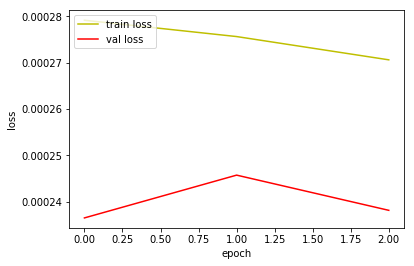

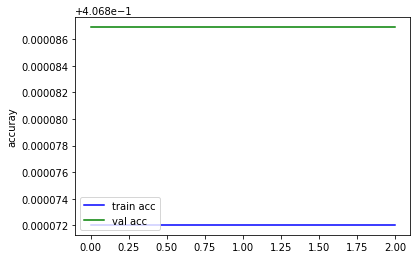

In [0]:
model_json = model.to_json()
with open("notification/archive/savecheckpoint/LSTM_money_0830_mse.json", "w") as json_file : 
    json_file.write(model_json)

import pickle

hist = model.history

with open("notification/archive/savecheckpoint/LSTM_money_0830_mse_hist.txt", "wb") as f:
  pickle.dump(hist, f)

loaded_hist = None

with open("notification/archive/savecheckpoint/LSTM_money_0830_mse_hist.txt", "rb") as f:
  loaded_hist = pickle.load(f)
  
# 저장한 histroy file을 load하여 시각화!

hist = loaded_hist

import matplotlib.pyplot as plt

%matplotlib inline

fig, loss_ax = plt.subplots()
fig2, acc_ax = plt.subplots()

# acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# Just Many to Many model : for money

In [0]:
train_label_money.head()

,acc_id,amount_spent
22410,2,0.000000
12651,5,0.000000
5494,8,0.020310
6811,17,0.070642
16854,20,0.052137


In [0]:
feature_num = data_28_val.shape[1]
xdata = data_28_val.reshape(-1,28,feature_num)
ydata = train_label['amount_spent'].values.reshape(-1,1)

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(xdata, ydata, test_size=0.2)

print(x_train.shape, y_train.shape)

(32000, 28, 52) (32000, 1)


In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

model_path = "notification/archive/savecheckpoint/LSTM_money_0830_28_mse.h5"

cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
cb_es = EarlyStopping(monitor='val_loss', patience=5)

In [0]:
from keras.layers import *
from keras.models import *
import tensorflow as tf
import keras.backend as K

tf.reset_default_graph()
K.clear_session()
time_step = 28
input_dim = xdata.shape[-1]
ylabel_dim = y_train.shape[1]

model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape=(time_step, input_dim)))
model.add(Dropout(0.3))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(ylabel_dim, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop', metrics=['acc'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 28, 256)           316416    
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 256)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 28, 128)           197120    
_________________________________________________________________
dropout_2 (Dropout)          (None, 28, 128)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3584)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               917760    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)              

In [0]:
model.fit(x_train, y_train, batch_size=256, epochs=5, verbose=1, callbacks=[cb_checkpoint, cb_es], validation_data=(x_test,y_test))

Train on 32000 samples, validate on 8000 samples
Epoch 1/5
32000/32000 [==============================] - 18s 565us/step - loss: 0.6812 - acc: 0.4013 - val_loss: 0.2951 - val_acc: 0.4178

Epoch 00001: val_loss improved from inf to 0.29507, saving model to /content/drive/My Drive/Colab Notebooks/data/LSTM_money_0830_28_mse.h5
Epoch 2/5
32000/32000 [==============================] - 17s 517us/step - loss: 0.5731 - acc: 0.4059 - val_loss: 0.2873 - val_acc: 0.4176

Epoch 00002: val_loss improved from 0.29507 to 0.28730, saving model to /content/drive/My Drive/Colab Notebooks/data/LSTM_money_0830_28_mse.h5
Epoch 3/5
32000/32000 [==============================] - 17s 518us/step - loss: 0.5689 - acc: 0.4061 - val_loss: 0.2854 - val_acc: 0.4168

Epoch 00003: val_loss improved from 0.28730 to 0.28544, saving model to /content/drive/My Drive/Colab Notebooks/data/LSTM_money_0830_28_mse.h5
Epoch 4/5
32000/32000 [==============================] - 17s 519us/step - loss: 0.5672 - acc: 0.4065 - val_lo

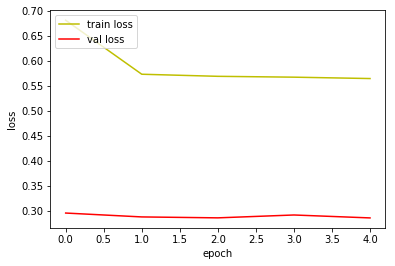

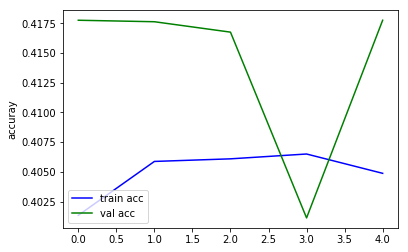

In [0]:
model_json = model.to_json()
with open("notification/archive/savecheckpoint/LSTM_money_0830_28_mse.json", "w") as json_file : 
    json_file.write(model_json)

import pickle

hist = model.history

with open("notification/archive/savecheckpoint/LSTM_money_0830_28_mse_hist.txt", "wb") as f:
  pickle.dump(hist, f)

loaded_hist = None

with open("notification/archive/savecheckpoint/LSTM_money_0830_28_mse_hist.txt", "rb") as f:
  loaded_hist = pickle.load(f)
  
# 저장한 histroy file을 load하여 시각화!

hist = loaded_hist

import matplotlib.pyplot as plt

%matplotlib inline

fig, loss_ax = plt.subplots()
fig2, acc_ax = plt.subplots()

# acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# many to one model

In [0]:
feature_num = data_28_val.shape[1]
xdata = data_28.values.reshape(-1,28,feature_num)
ydata = train_label['amount_spent'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(xdata, ydata, test_size=0.2)

print(x_train.shape, y_train.shape)

from keras.callbacks import EarlyStopping, ModelCheckpoint

model_path = "notification/archive/savecheckpoint/LSTM_money_0830_28_mse_m2o.h5"

cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
cb_es = EarlyStopping(monitor='val_loss', patience=5)

from keras.layers import *
from keras.models import *
import tensorflow as tf
import keras.backend as K

tf.reset_default_graph()
K.clear_session()
time_step = 28
input_dim = xdata.shape[-1]
ylabel_dim = y_train.shape[1]

model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape=(time_step, input_dim)))
model.add(Dropout(0.3))
model.add(LSTM(256, return_sequences=False))
model.add(Dropout(0.3))
# model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(ylabel_dim, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop', metrics=['acc'])

model.summary()

(32000, 28, 52) (32000, 1)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 28, 256)           316416    
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 256)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                8224      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)            

Train on 32000 samples, validate on 8000 samples
Epoch 1/100
32000/32000 [==============================] - 23s 711us/step - loss: 0.4695 - acc: 0.4057 - val_loss: 0.6119 - val_acc: 0.4161

Epoch 00001: val_loss did not improve from 0.60834
Epoch 2/100
32000/32000 [==============================] - 22s 696us/step - loss: 0.4605 - acc: 0.4069 - val_loss: 0.6135 - val_acc: 0.4149

Epoch 00002: val_loss did not improve from 0.60834
Epoch 3/100
32000/32000 [==============================] - 22s 686us/step - loss: 0.4587 - acc: 0.4074 - val_loss: 0.6137 - val_acc: 0.4160

Epoch 00003: val_loss did not improve from 0.60834
Epoch 4/100
32000/32000 [==============================] - 22s 680us/step - loss: 0.4557 - acc: 0.4075 - val_loss: 0.6046 - val_acc: 0.4140

Epoch 00004: val_loss improved from 0.60834 to 0.60457, saving model to /content/drive/My Drive/Colab Notebooks/data/LSTM_money_0830_28_mse_m2o.h5
Epoch 5/100
32000/32000 [==============================] - 23s 708us/step - loss: 0.461

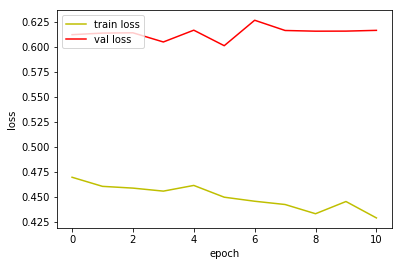

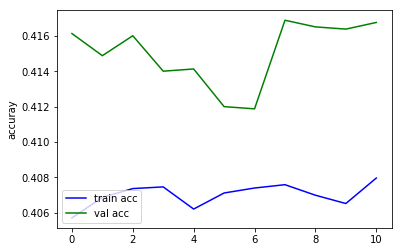

In [0]:
model.fit(x_train, y_train, batch_size=256, epochs=100, verbose=1, callbacks=[cb_checkpoint, cb_es], validation_data=(x_test,y_test))

model_json = model.to_json()
with open("notification/archive/savecheckpoint/LSTM_money_0830_28_mse_m2o.json", "w") as json_file : 
    json_file.write(model_json)

import pickle

hist = model.history

with open("notification/archive/savecheckpoint/LSTM_money_0830_28_mse_m2o_hist.txt", "wb") as f:
  pickle.dump(hist, f)

loaded_hist = None

with open("notification/archive/savecheckpoint/LSTM_money_0830_28_mse_m2o_hist.txt", "rb") as f:
  loaded_hist = pickle.load(f)
  
# 저장한 histroy file을 load하여 시각화!

hist = loaded_hist

import matplotlib.pyplot as plt

%matplotlib inline

fig, loss_ax = plt.subplots()
fig2, acc_ax = plt.subplots()

# acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# corr analysis

In [0]:
df.head()

,acc_id,day,combat_count,c_etc_cnt,c_num_opponent,c_pledge_cnt,c_random_attacker_cnt,c_random_defender_cnt,c_same_pledge_cnt,c_temp_cnt,isMajorClass,combat_logged_in,tot_start_lv,tot_end_lv,changed_lv,avg_start_lv,avg_end_lv,avg_play_rate_rank_per_p,p_c_char_cnt,p_c_sum_play_time,p_etc_cnt,p_non_c_sum_play_time,p_play_char_cnt,p_c_cnt,p_random_attacker_cnt,p_random_defender_cnt,p_same_pledge_cnt,p_temp_cnt,tot_c_rank_per_p,pledge_num_people,pledge_logged_in,sell_item_amount,sell_item_price,get_item_amount,get_item_price,trade_time_bin_0,trade_time_bin_1,trade_time_bin_2,trade_time_bin_3,trade_type_0,trade_type_1,tot_trade_amount,tot_get_money,trade_logged_in,count_sell,count_get,total_trade_count,a_death_cnt,a_enchant_count,a_exp_recovery_cnt,a_fish,a_money_change,a_npc_kill,a_party_exp,a_playtime,a_private_shop,a_quest_exp,a_revive_cnt,a_boss_monster,a_solo_exp,tot_exp,fishing_prop,qexp_per_playtime,sexp_per_playtime,pexp_per_playtime,activity_logged_in,amount_spent,max_spent,min_spent,mean_spent,tot_spent,median_spent,payment_logged_in
0,2,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,114.0,36300925.0,0.0,0.0,5.0,0.0,1.0,0.0,6.0,0.0,114.0,36300925.0,1.0,34.0,2.0,36.0,0.0,0.0,0.0,0.0,1.024810,0.0,0.0,2.703457,2.462447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2120660.0,1.0,13000000.0,0.0,1.0,1.0,0.0,1.0,1.0,5.0,-10879340.0,1.0,34.0,2.0,36.0,0.0,0.0,0.0,0.0,-1.044201,0.0,0.0,3.363522,3.149118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,16089682.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,31.0,16089682.0,1.0,34.0,2.0,36.0,0.0,0.0,0.0,0.0,0.451317,0.0,0.0,3.370544,3.183447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.007230,0.0,0.0,3.370544,3.131992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,798000.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,798000.0,1.0,34.0,2.0,36.0,0.0,0.0,0.0,0.0,0.015398,0.0,0.0,3.370544,3.135698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
df_ = df.values.reshape(40000,28,-1)
df_.shape

(40000, 28, 73)

In [0]:
df_ = df_.mean(axis=1)
df_.shape

(40000, 73)

In [0]:
df_ = pd.DataFrame(df_, columns=df.columns)

In [0]:
df_ = df_.drop(columns=['day'])
df_.head()

,acc_id,combat_count,c_etc_cnt,c_num_opponent,c_pledge_cnt,c_random_attacker_cnt,c_random_defender_cnt,c_same_pledge_cnt,c_temp_cnt,isMajorClass,combat_logged_in,tot_start_lv,tot_end_lv,changed_lv,avg_start_lv,avg_end_lv,avg_play_rate_rank_per_p,p_c_char_cnt,p_c_sum_play_time,p_etc_cnt,p_non_c_sum_play_time,p_play_char_cnt,p_c_cnt,p_random_attacker_cnt,p_random_defender_cnt,p_same_pledge_cnt,p_temp_cnt,tot_c_rank_per_p,pledge_num_people,pledge_logged_in,sell_item_amount,sell_item_price,get_item_amount,get_item_price,trade_time_bin_0,trade_time_bin_1,trade_time_bin_2,trade_time_bin_3,trade_type_0,trade_type_1,tot_trade_amount,tot_get_money,trade_logged_in,count_sell,count_get,total_trade_count,a_death_cnt,a_enchant_count,a_exp_recovery_cnt,a_fish,a_money_change,a_npc_kill,a_party_exp,a_playtime,a_private_shop,a_quest_exp,a_revive_cnt,a_boss_monster,a_solo_exp,tot_exp,fishing_prop,qexp_per_playtime,sexp_per_playtime,pexp_per_playtime,activity_logged_in,amount_spent,max_spent,min_spent,mean_spent,tot_spent,median_spent,payment_logged_in
0,2.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.464286,3.783216e+06,0.107143,4.693911e+05,0.357143,0.142857,0.285714,0.500000,1.250000,0.035714,17.571429,3.313825e+06,0.714286,24.285714,1.428571,25.714286,0.000000,0.0,0.0,0.000000,-0.000312,0.000000,0.000000,3.269059,3.032170,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5.0,0.642857,0.000000,0.003505,0.000000,0.000000,0.000000,0.000000,0.017133,1.000000,0.357143,7.142857,7.142857,0.0,2.380952,2.380952,0.084386,0.158793,0.509761,0.081400,0.000440,0.555776,0.000000,0.193657,0.092991,0.000000,0.257096,0.000021,63.857143,0.357143,0.000000,0.000000e+00,300.178571,1.622947e+05,0.000000,0.107143,0.178571,0.071429,0.357143,0.000000,300.178571,-1.622947e+05,0.178571,0.000000,1.785714,0.000000,0.008782,0.0,0.0,0.122961,0.005184,0.115588,0.024832,0.218433,0.000000,0.003966,0.008833,0.321429,0.076980,0.105778,0.202979,0.005810,0.154602,0.030398,0.357143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,8.0,4.750000,0.032175,0.108643,0.004585,0.152531,0.042252,0.000000,0.137065,0.459864,1.000000,100.000000,99.000000,-1.0,14.285714,14.142857,1.001630,2.072558,4.888566,2.191229,0.001208,7.189508,0.097048,1.201134,0.776626,1.051483,3.301987,0.005006,773.281718,1.000000,0.142857,3.639286e+06,1.571429,1.639089e+05,0.214286,0.000000,0.000000,0.142857,0.071429,0.285714,1.714286,3.475377e+06,0.178571,0.714286,1.071429,1.785714,3.284301,0.0,0.0,0.171708,0.000727,1.113307,0.000000,0.671350,0.000000,0.055752,3.303714,0.071429,1.124612,1.180364,0.168829,0.083122,2.094823,0.000000,1.000000,0.050166,0.075437,0.024894,0.050166,0.100332,0.050166,0.071429
3,17.0,1.857143,0.024131,0.049064,0.000000,0.000000,0.084505,0.442795,0.119932,0.699405,1.000000,33.000000,34.000000,1.0,8.250000,8.500000,0.358239,0.774631,2.346199,0.446942,0.000000,2.546875,0.017367,0.329678,0.388313,0.056837,1.313732,0.000620,707.000000,1.000000,0.214286,4.428571e+06,17.714286,8.968129e+06,0.392857,0.321429,0.000000,1.035714,1.392857,0.357143,17.928571,-4.539558e+06,0.535714,3.214286,23.035714,26.250000,0.061471,0.0,0.0,0.499677,-0.000989,1.087745,0.315111,1.016597,0.000000,0.082942,0.061834,0.750000,0.330566,0.728618,1.437001,0.132524,0.509362,0.608762,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,20.0,1.357143,0.587189,0.360974,0.045846,0.000000,0.042252,0.000000,0.017133,0.000000,0.964286,22.178571,22.178571,0.0,11.089286,11.089286,0.275697,0.945006,2.461182,1.644779,0.000000,2.033032,0.294978,0.443498,0.243736,0.412594,1.051090,0.012945,910.035714,0.964286,0.142857,9.310000e+06,164.071429,1.065842e+07,0.000000,0.357143,0.000000,1.285714,1

In [0]:
df_corr = pd.merge(df_.drop(columns='amount_spent'), train_label, on='acc_id')
df_corr.shape

(40000, 73)

In [0]:
df_corr.head()

,acc_id,combat_count,c_etc_cnt,c_num_opponent,c_pledge_cnt,c_random_attacker_cnt,c_random_defender_cnt,c_same_pledge_cnt,c_temp_cnt,isMajorClass,combat_logged_in,tot_start_lv,tot_end_lv,changed_lv,avg_start_lv,avg_end_lv,avg_play_rate_rank_per_p,p_c_char_cnt,p_c_sum_play_time,p_etc_cnt,p_non_c_sum_play_time,p_play_char_cnt,p_c_cnt,p_random_attacker_cnt,p_random_defender_cnt,p_same_pledge_cnt,p_temp_cnt,tot_c_rank_per_p,pledge_num_people,pledge_logged_in,sell_item_amount,sell_item_price,get_item_amount,get_item_price,trade_time_bin_0,trade_time_bin_1,trade_time_bin_2,trade_time_bin_3,trade_type_0,trade_type_1,tot_trade_amount,tot_get_money,trade_logged_in,count_sell,count_get,total_trade_count,a_death_cnt,a_enchant_count,a_exp_recovery_cnt,a_fish,a_money_change,a_npc_kill,a_party_exp,a_playtime,a_private_shop,a_quest_exp,a_revive_cnt,a_boss_monster,a_solo_exp,tot_exp,fishing_prop,qexp_per_playtime,sexp_per_playtime,pexp_per_playtime,activity_logged_in,max_spent,min_spent,mean_spent,tot_spent,median_spent,payment_logged_in,survival_time,amount_spent
0,2.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.464286,3.783216e+06,0.107143,4.693911e+05,0.357143,0.142857,0.285714,0.500000,1.250000,0.035714,17.571429,3.313825e+06,0.714286,24.285714,1.428571,25.714286,0.000000,0.0,0.0,0.000000,-0.000312,0.000000,0.000000,3.269059,3.032170,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64,0.000000
1,5.0,0.642857,0.000000,0.003505,0.000000,0.000000,0.000000,0.000000,0.017133,1.000000,0.357143,7.142857,7.142857,0.0,2.380952,2.380952,0.084386,0.158793,0.509761,0.081400,0.000440,0.555776,0.000000,0.193657,0.092991,0.000000,0.257096,0.000021,63.857143,0.357143,0.000000,0.000000e+00,300.178571,1.622947e+05,0.000000,0.107143,0.178571,0.071429,0.357143,0.000000,300.178571,-1.622947e+05,0.178571,0.000000,1.785714,0.000000,0.008782,0.0,0.0,0.122961,0.005184,0.115588,0.024832,0.218433,0.000000,0.003966,0.008833,0.321429,0.076980,0.105778,0.202979,0.005810,0.154602,0.030398,0.357143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60,0.000000
2,8.0,4.750000,0.032175,0.108643,0.004585,0.152531,0.042252,0.000000,0.137065,0.459864,1.000000,100.000000,99.000000,-1.0,14.285714,14.142857,1.001630,2.072558,4.888566,2.191229,0.001208,7.189508,0.097048,1.201134,0.776626,1.051483,3.301987,0.005006,773.281718,1.000000,0.142857,3.639286e+06,1.571429,1.639089e+05,0.214286,0.000000,0.000000,0.142857,0.071429,0.285714,1.714286,3.475377e+06,0.178571,0.714286,1.071429,1.785714,3.284301,0.0,0.0,0.171708,0.000727,1.113307,0.000000,0.671350,0.000000,0.055752,3.303714,0.071429,1.124612,1.180364,0.168829,0.083122,2.094823,0.000000,1.000000,0.075437,0.024894,0.050166,0.100332,0.050166,0.071429,64,0.020310
3,17.0,1.857143,0.024131,0.049064,0.000000,0.000000,0.084505,0.442795,0.119932,0.699405,1.000000,33.000000,34.000000,1.0,8.250000,8.500000,0.358239,0.774631,2.346199,0.446942,0.000000,2.546875,0.017367,0.329678,0.388313,0.056837,1.313732,0.000620,707.000000,1.000000,0.214286,4.428571e+06,17.714286,8.968129e+06,0.392857,0.321429,0.000000,1.035714,1.392857,0.357143,17.928571,-4.539558e+06,0.535714,3.214286,23.035714,26.250000,0.061471,0.0,0.0,0.499677,-0.000989,1.087745,0.315111,1.016597,0.000000,0.082942,0.061834,0.750000,0.330566,0.728618,1.437001,0.132524,0.509362,0.608762,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64,0.070642
4,20.0,1.357143,0.587189,0.360974,0.045846,0.000000,0.042252,0.000000,0.017133,0.000000,0.964286,22.178571,22.178571,0.0,11.089286,11.089286,0.275697,0.945006,2.461182,1.644779,0.000000,2.033032,0.294978,0.443498,0.243736,0.412594,1.051090,0.012945,910.035714,0.964286,0.142857,9.310000e+06,164.071429,1.065842e+07,0.000000,0.

In [0]:
df_corr.drop(columns='acc_id').corr().drop(['survival_time','amount_spent'])

,combat_count,c_etc_cnt,c_num_opponent,c_pledge_cnt,c_random_attacker_cnt,c_random_defender_cnt,c_same_pledge_cnt,c_temp_cnt,isMajorClass,combat_logged_in,tot_start_lv,tot_end_lv,changed_lv,avg_start_lv,avg_end_lv,avg_play_rate_rank_per_p,p_c_char_cnt,p_c_sum_play_time,p_etc_cnt,p_non_c_sum_play_time,p_play_char_cnt,p_c_cnt,p_random_attacker_cnt,p_random_defender_cnt,p_same_pledge_cnt,p_temp_cnt,tot_c_rank_per_p,pledge_num_people,pledge_logged_in,sell_item_amount,sell_item_price,get_item_amount,get_item_price,trade_time_bin_0,trade_time_bin_1,trade_time_bin_2,trade_time_bin_3,trade_type_0,trade_type_1,tot_trade_amount,tot_get_money,trade_logged_in,count_sell,count_get,total_trade_count,a_death_cnt,a_enchant_count,a_exp_recovery_cnt,a_fish,a_money_change,a_npc_kill,a_party_exp,a_playtime,a_private_shop,a_quest_exp,a_revive_cnt,a_boss_monster,a_solo_exp,tot_exp,fishing_prop,qexp_per_playtime,sexp_per_playtime,pexp_per_playtime,activity_logged_in,max_spent,min_spent,mean_spent,tot_spent,median_spent,payment_logged_in,survival_time,amount_spent
combat_count,1.000000,0.107044,0.210892,0.170844,0.087979,0.069107,0.125942,0.074784,-0.018227,0.455748,0.725680,0.725904,0.025673,0.223103,0.210612,0.342973,0.268132,0.314318,0.137760,0.094606,0.332793,0.163858,0.201180,0.108777,0.259422,0.299529,0.135648,0.261860,0.371985,-0.004375,0.243297,0.148289,0.269382,0.197800,0.238975,0.270959,0.234986,0.157329,0.395532,0.036155,-0.050129,0.318940,0.115834,0.427315,0.244090,0.127659,0.027728,0.066970,0.209160,-0.002049,0.249170,0.011522,0.161255,-0.058406,0.160380,0.130039,0.481658,0.166269,0.138667,0.003077,0.018703,0.072876,-0.011695,0.455748,0.169529,0.073754,0.173885,0.154532,0.139189,0.209627,0.263933,-0.023642
c_etc_cnt,0.107044,1.000000,0.508728,0.333669,0.185171,0.127036,0.115705,0.050940,-0.002378,0.119842,0.060181,0.066371,0.058061,0.090400,0.099915,0.044277,0.165004,0.097553,0.287139,-0.053886,0.035283,0.177453,0.063635,0.002703,0.084683,0.050940,0.098383,0.081072,0.149690,-0.010111,-0.017575,0.045815,-0.012794,0.016585,0.051866,0.033503,0.022836,0.016040,0.055288,0.002745,-0.017480,0.135058,-0.031543,0.151410,0.028564,0.141242,0.014444,0.024842,0.031465,-0.002592,0.320143,0.035342,0.106818,-0.117820,0.063559,0.134616,0.113590,0.088981,0.084720,-0.012585,0.015177,0.021658,0.046758,0.119842,0.179696,0.049111,0.160751,0.152289,0.107636,0.160507,0.048745,0.001041
c_num_opponent,0.210892,0.508728,1.000000,0.922289,0.218301,0.112245,0.309098,0.056493,0.024718,0.146142,0.084234,0.089074,0.046604,0.055578,0.060572,0.195864,0.395689,0.287211,0.414390,-0.060590,0.167325,0.663886,0.265959,0.076972,0.321958,0.217778,0.463740,0.334304,0.214435,-0.011200,0.015779,0.098559,0.014940,0.049312,0.072547,0.060655,0.062658,0.039830,0.103112,0.016054,0.004762,0.261172,-0.029319,0.233951,0.060016,0.306599,0.021172,0.024617,0.099168,-0.013322,0.327932,0.003674,0.080654,-0.128290,0.035758,0.307713,0.218630,0.039375,0.032702,-0.009839,-0.008366,-0.008791,0.016264,0.146142,0.391160,0.062784,0.325532,0.325887,0.196768,0.339756,0.118489,0.021017
c_pledge_cnt,0.170844,0.333669,0.922289,1.000000,0.109471,0.085169,0.282047,0.045064,0.016657,0.105957,0.041758,0.042367,0.006886,0.017523,0.015899,0.164713,0.322787,0.249068,0.308212,-0.040580,0.136024,0.664969,0.235044,0.078556,0.295499,0.192480,0.480768,0.313638,0.156998,-0.007255,0.027976,0.090931,0.024698,0.046057,0.066341,0.057315,0.058241,0.041268,0.084563,0.017772,0.014109,0.223769,-0.015403,0.195370,0.057535,0.271978,0.015718,0.009619,0.074443,-0.015385,0.276347,-0.023037,0.072123,-0.078866,-0.028992,0.275529,0.148075,-0.040106,-0.042579,-0.007199,-0.041581,-0.050554,-0.018473,0.105957,0.346960,0.042298,0.276641,0.280668,0.154804,0.283191,0.111181,0.023414
c_random_attacker_cnt,0.087979,0.185171,0.218301,0.109471,1.000000,0.008463,0.081914,0.024620,0.042836,0.049314,0.084635,0.084208,-0.001118,0.032242,0.029709,0.063684,0.079837,0.061516,0.057508,-0.014971,0.061307,0.080258,0.186665,0.013592,0.094011,0.078862,0.06

In [0]:
df_corr = df_corr.drop(columns='acc_id').corr().drop(['survival_time','amount_spent'])

In [0]:
sur_corr = df_corr['survival_time'].sort_values()
sur_corr

tot_exp                    -0.132144
qexp_per_playtime          -0.120486
a_party_exp                -0.102179
sexp_per_playtime          -0.100187
pexp_per_playtime          -0.098493
a_solo_exp                 -0.097808
a_quest_exp                -0.072520
p_non_c_sum_play_time      -0.058981
p_random_defender_cnt      -0.053159
changed_lv                 -0.050727
p_play_char_cnt            -0.039692
avg_play_rate_rank_per_p   -0.034218
fishing_prop               -0.025161
c_random_defender_cnt      -0.019688
a_money_change             -0.010725
a_death_cnt                -0.004369
p_etc_cnt                  -0.003774
p_c_char_cnt                0.004120
a_revive_cnt                0.005662
a_enchant_count             0.007685
p_c_sum_play_time           0.008918
get_item_amount             0.015754
sell_item_amount            0.023675
tot_trade_amount            0.027059
a_exp_recovery_cnt          0.034079
c_random_attacker_cnt       0.041769
isMajorClass                0.042195
m

In [0]:
sur_list = sur_corr[abs(sur_corr)>0.1].index

In [0]:
# corr = df_corr.drop(index=['amount_spent','survival_time'],columns='acc_id').corr().sort_values(by=['survival_time'])
# import seaborn as sns
# import matplotlib.pyplot as plt
# plt.figure(figsize=(20,12))
# sns.heatmap(corr, annot=False)

In [0]:
corr['survival_time']

tot_exp                    -0.132144
qexp_per_playtime          -0.120486
amount_spent               -0.106241
a_party_exp                -0.102179
sexp_per_playtime          -0.100187
pexp_per_playtime          -0.098493
a_solo_exp                 -0.097808
a_quest_exp                -0.072520
p_non_c_sum_play_time      -0.058981
p_random_defender_cnt      -0.053159
changed_lv                 -0.050727
p_play_char_cnt            -0.039692
avg_play_rate_rank_per_p   -0.034218
fishing_prop               -0.025161
c_random_defender_cnt      -0.019688
a_money_change             -0.010725
a_death_cnt                -0.004369
p_etc_cnt                  -0.003774
p_c_char_cnt                0.004120
a_revive_cnt                0.005662
a_enchant_count             0.007685
p_c_sum_play_time           0.008918
get_item_amount             0.015754
sell_item_amount            0.023675
tot_trade_amount            0.027059
a_exp_recovery_cnt          0.034079
c_random_attacker_cnt       0.041769
i

In [0]:
corr_survival = corr['survival_time']

In [0]:
len(corr_survival[abs(corr_survival)>0.1].index)

26

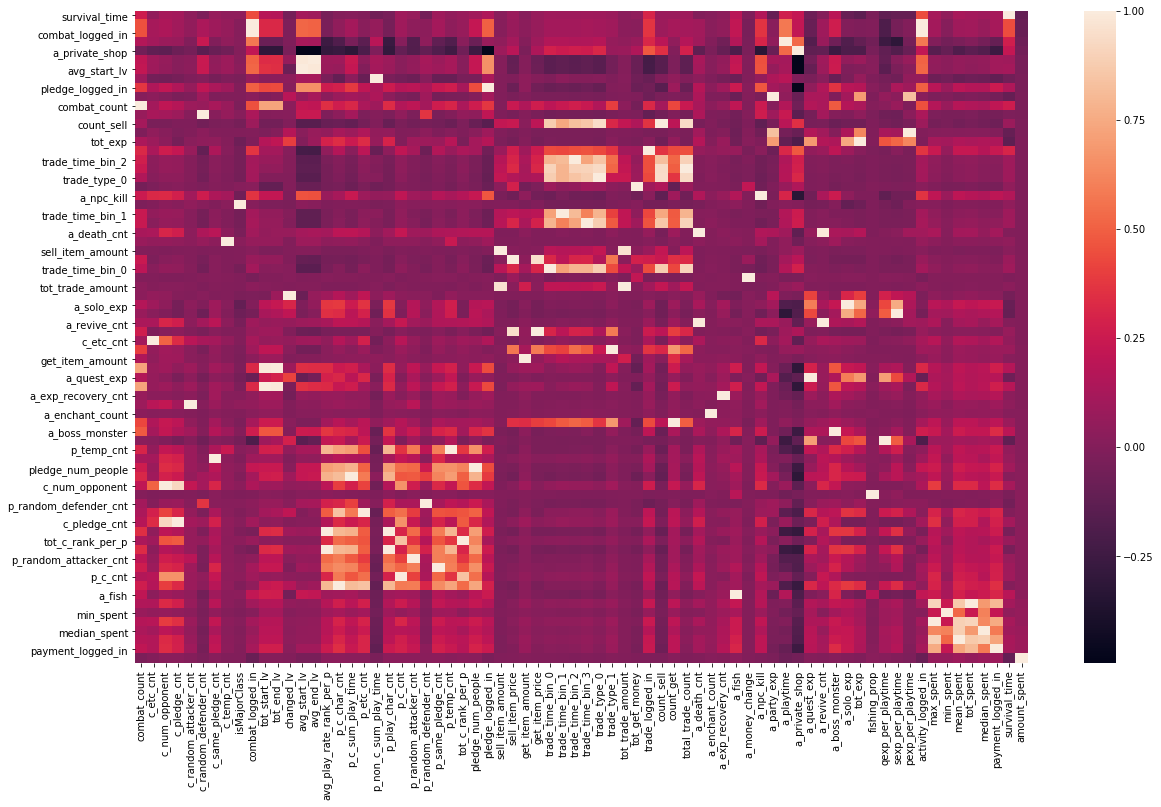

In [0]:
corr = df_corr.drop(columns='acc_id').corr().sort_values(by=['amount_spent'])
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,12))
sns.heatmap(corr, annot=False)

In [0]:
corr['amount_spent']

survival_time              -0.106241
activity_logged_in         -0.086478
combat_logged_in           -0.086478
a_playtime                 -0.073310
a_private_shop             -0.055115
avg_end_lv                 -0.036953
avg_start_lv               -0.034974
p_non_c_sum_play_time      -0.028666
pledge_logged_in           -0.028097
a_party_exp                -0.025621
combat_count               -0.023642
c_random_defender_cnt      -0.023449
count_sell                 -0.018812
pexp_per_playtime          -0.018117
tot_exp                    -0.015198
trade_logged_in            -0.014755
trade_time_bin_2           -0.012707
total_trade_count          -0.011553
trade_type_0               -0.011321
tot_get_money              -0.011220
a_npc_kill                 -0.010778
isMajorClass               -0.009645
trade_time_bin_1           -0.009262
trade_time_bin_3           -0.007452
a_death_cnt                -0.005349
c_temp_cnt                 -0.004833
sell_item_amount           -0.004685
s

In [0]:
corr_spent = corr['amount_spent']

In [0]:
corr_spent[abs(corr_spent)>0.001].index

Index(['survival_time', 'activity_logged_in', 'combat_logged_in', 'a_playtime',
       'a_private_shop', 'avg_end_lv', 'avg_start_lv', 'p_non_c_sum_play_time',
       'pledge_logged_in', 'a_party_exp', 'combat_count',
       'c_random_defender_cnt', 'count_sell', 'pexp_per_playtime', 'tot_exp',
       'trade_logged_in', 'trade_time_bin_2', 'total_trade_count',
       'trade_type_0', 'tot_get_money', 'a_npc_kill', 'isMajorClass',
       'trade_time_bin_1', 'trade_time_bin_3', 'a_death_cnt', 'c_temp_cnt',
       'sell_item_amount', 'sell_item_price', 'trade_time_bin_0',
       'a_money_change', 'tot_trade_amount', 'changed_lv', 'a_solo_exp',
       'sexp_per_playtime', 'a_revive_cnt', 'get_item_price', 'c_etc_cnt',
       'trade_type_1', 'get_item_amount', 'tot_end_lv', 'a_quest_exp',
       'tot_start_lv', 'a_exp_recovery_cnt', 'c_random_attacker_cnt',
       'a_enchant_count', 'count_get', 'a_boss_monster', 'qexp_per_playtime',
       'p_temp_cnt', 'c_same_pledge_cnt', 'pledge_num_peop